<a href="https://colab.research.google.com/github/lisianshehu/BigData-AI/blob/master/SolarEnergy_w_LSTM_%26_MC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
from tqdm import tqdm 
from sklearn.metrics import accuracy_score

mpl.rcParams['figure.figsize'] = (12, 8)
mpl.rcParams['axes.grid'] = False

In [ ]:
df = pd.read_csv('Plant_1_Generation_Data.csv')
df2 = pd.read_csv('Plant_1_Weather_Sensor_Data.csv')
display(df)
display(df2)

DATE_TIME  PLANT_ID  ... DAILY_YIELD  TOTAL_YIELD
0      15-05-2020 00:00   4135001  ...       0.000    6259559.0
1      15-05-2020 00:00   4135001  ...       0.000    6183645.0
2      15-05-2020 00:00   4135001  ...       0.000    6987759.0
3      15-05-2020 00:00   4135001  ...       0.000    7602960.0
4      15-05-2020 00:00   4135001  ...       0.000    7158964.0
...                 ...       ...  ...         ...          ...
68773  17-06-2020 23:45   4135001  ...    5967.000    7287002.0
68774  17-06-2020 23:45   4135001  ...    5147.625    7028601.0
68775  17-06-2020 23:45   4135001  ...    5819.000    7251204.0
68776  17-06-2020 23:45   4135001  ...    5817.000    6583369.0
68777  17-06-2020 23:45   4135001  ...    5910.000    7363272.0

[68778 rows x 7 columns]

DATE_TIME  PLANT_ID  ... MODULE_TEMPERATURE  IRRADIATION
0     2020-05-15 00:00:00   4135001  ...          22.857507          0.0
1     2020-05-15 00:15:00   4135001  ...          22.761668          0.0
2     2020-05-15 00:30:00   4135001  ...          22.592306          0.0
3     2020-05-15 00:45:00   4135001  ...          22.360852          0.0
4     2020-05-15 01:00:00   4135001  ...          22.165423          0.0
...                   ...       ...  ...                ...          ...
3177  2020-06-17 22:45:00   4135001  ...          21.480377          0.0
3178  2020-06-17 23:00:00   4135001  ...          21.389024          0.0
3179  2020-06-17 23:15:00   4135001  ...          20.709211          0.0
3180  2020-06-17 23:30:00   4135001  ...          20.734963          0.0
3181  2020-06-17 23:45:00   4135001  ...          20.427972          0.0

[3182 rows x 6 columns]

In [ ]:
df.SOURCE_KEY.drop_duplicates()
display(df[:50])
# Get the source key of each inverter

DATE_TIME  PLANT_ID  ... DAILY_YIELD  TOTAL_YIELD
0   15-05-2020 00:00   4135001  ...         0.0    6259559.0
1   15-05-2020 00:00   4135001  ...         0.0    6183645.0
2   15-05-2020 00:00   4135001  ...         0.0    6987759.0
3   15-05-2020 00:00   4135001  ...         0.0    7602960.0
4   15-05-2020 00:00   4135001  ...         0.0    7158964.0
5   15-05-2020 00:00   4135001  ...         0.0    7206408.0
6   15-05-2020 00:00   4135001  ...         0.0    7028673.0
7   15-05-2020 00:00   4135001  ...         0.0    6522172.0
8   15-05-2020 00:00   4135001  ...         0.0    7098099.0
9   15-05-2020 00:00   4135001  ...         0.0    6271355.0
10  15-05-2020 00:00   4135001  ...         0.0    6316803.0
11  15-05-2020 00:00   4135001  ...         0.0    7177992.0
12  15-05-2020 00:00   4135001  ...         0.0    6185184.0
13  15-05-2020 00:00   4135001  ...         0.0    7169102.0
14  15-05-2020 00:00   4135001  ...         0.0    7111493.0
15  15-05-2020 00:00   4135001  ...         0.0    7016832.0
16  15-05-2020 00:00   4135001  ...         0.0    7038681.0
17  15-05-2020 00:00   4135001  ...         0.0    6782598.0
18  15-05-2020 00:00   4135001  ...         0.0    7007866.0
19  15-05-2020 00:00   4135001  ...         0.0    6339380.0
20  15-05-2020 00:00   4135001  ...         0.0    7116151.0
21  15-05-2020 00:15   4135001  ...         0.0    6259559.0
22  15-05-2020 00:15   4135001  ...         0.0    6183645.0
23  15-05-2020 00:15   4135001  ...         0.0    6987759.0
24  15-05-2020 00:15   4135001  ...         0.0    7602960.0
25  15-05-2020 00:15   4135001  ...         0.0    7158964.0
26  15-05-2020 00:15   4135001  ...         0.0    7206408.0
27  15-05-2020 00:15   4135001  ...         0.0    7028673.0
28  15-05-2020 00:15   4135001  ...         0.0    6522172.0
29  15-05-2020 00:15   4135001  ...         0.0    7098099.0
30  15-05-2020 00:15   4135001  ...         0.0    6271355.0
31  15-05-2020 00:15   4135001  ...         0.0    6316803.0
32  15-05-2020 00:15   4135001  ...         0.0    7177992.0
33  15-05-2020 00:15   4135001  ...         0.0    6185184.0
34  15-05-2020 00:15   4135001  ...         0.0    7169102.0
35  15-05-2020 00:15   4135001  ...         0.0    7111493.0
36  15-05-2020 00:15   4135001  ...         0.0    7016832.0
37  15-05-2020 00:15   4135001  ...         0.0    7038681.0
38  15-05-2020 00:15   4135001  ...         0.0    6782598.0
39  15-05-2020 00:15   4135001  ...         0.0    7007866.0
40  15-05-2020 00:15   4135001  ...         0.0    6339380.0
41  15-05-2020 00:15   4135001  ...         0.0    7116151.0
42  15-05-2020 00:30   4135001  ...         0.0    6259559.0
43  15-05-2020 00:30   4135001  ...         0.0    6183645.0
44  15-05-2020 00:30   4135001  ...         0.0    6987759.0
45  15-05-2020 00:30   4135001  ...         0.0    7602960.0
46  15-05-2020 00:30   4135001  ...         0.0    7158964.0
47  15-05-2020 00:30   4135001  ...         0.0    7206408.0
48  15-05-2020 00:30   4135001  ...         0.0    7028673.0
49  15-05-2020 00:30   4135001  ...         0.0    6522172.0

[50 rows x 7 columns]

In [ ]:
# Cleaning datasheet, some naming issue
part1 = pd.DataFrame(df[0:33111])
part2 = df[33112:58262]
part3 = df[58263:68778]

# Format time from inconsistency
part1 =part1.assign(DATE_TIME = pd.to_datetime(part1.DATE_TIME))
part2 =part2.assign(DATE_TIME = pd.to_datetime(part2.DATE_TIME,dayfirst=True))
part3 =part3.assign(DATE_TIME = pd.to_datetime(part3.DATE_TIME))

data = pd.concat([part1,part2,part3])

power = data.groupby('DATE_TIME')[['DC_POWER','AC_POWER', 'DAILY_YIELD','TOTAL_YIELD']].agg('sum')
sensor = df2.assign(DATE_TIME = pd.to_datetime(df2.DATE_TIME))
combine = pd.merge(power,sensor, on="DATE_TIME")
combine

DATE_TIME  DC_POWER  ...  MODULE_TEMPERATURE  IRRADIATION
0    2020-05-15 00:00:00       0.0  ...           22.857507          0.0
1    2020-05-15 00:15:00       0.0  ...           22.761668          0.0
2    2020-05-15 00:30:00       0.0  ...           22.592306          0.0
3    2020-05-15 00:45:00       0.0  ...           22.360852          0.0
4    2020-05-15 01:00:00       0.0  ...           22.165423          0.0
...                  ...       ...  ...                 ...          ...
3152 2020-06-17 22:45:00       0.0  ...           21.480377          0.0
3153 2020-06-17 23:00:00       0.0  ...           21.389024          0.0
3154 2020-06-17 23:15:00       0.0  ...           20.709211          0.0
3155 2020-06-17 23:30:00       0.0  ...           20.734963          0.0
3156 2020-06-17 23:45:00       0.0  ...           20.427972          0.0

[3157 rows x 10 columns]

In [ ]:
# splitting data into train, validation and test

TRAIN_SPLIT = int(len(combine)*.6)
VAL_SPLIT = int(len(combine)*0.2)
TEST_SPLIT = int(len(combine)*0.2)
print(TRAIN_SPLIT, VAL_SPLIT, TEST_SPLIT)

1894 631 631


In [ ]:
tf.random.set_seed(47)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0379d646d8>],
      dtype=object)

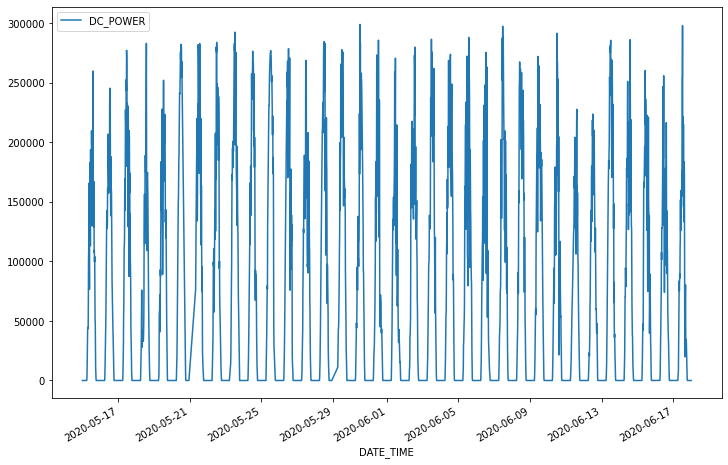

In [ ]:
# feature engineering 

features_considered = ['DC_POWER']
features = combine[features_considered]
features.index = combine['DATE_TIME']
features.plot(subplots=True)

In [ ]:
# normalize dataset

features_dataset = features.values
data_mean = features_dataset[:TRAIN_SPLIT].mean(axis=0)
data_std = features_dataset[:TRAIN_SPLIT].std(axis=0)
dataset = (features_dataset-data_mean)/data_std
print(len(dataset))
dataset.shape

3157


(3157, 1)

In [ ]:
# used to window the data in consecutive time steps for predictions 
def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
  data = []
  labels = []
  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i, step)
    data.append(dataset[indices])

    if single_step:
      labels.append(target[i+target_size])
    else:
      labels.append(target[i:i+target_size])

  return np.array(data), np.array(labels)

In [ ]:
past_history = 288
future_target = 96
STEP = 4

x_train_single, y_train_single = multivariate_data(dataset, dataset[:, 0], 0,
                                                   TRAIN_SPLIT, past_history,
                                                   future_target, STEP,
                                                   single_step=True)
x_val_single, y_val_single = multivariate_data(dataset, dataset[:, 0],
                                               TRAIN_SPLIT, None, past_history,
                                               future_target, STEP,
                                               single_step=True)

print(x_train_single, y_train_single)

IndexError: ignored

In [ ]:
# get windows of data for 3 day history time with 24 hour future target 

BATCH_SIZE = 256
BUFFER_SIZE = 10000
future_target = 96
x_train_multi, y_train_multi = multivariate_data(dataset, dataset[:], 0,
                                                 TRAIN_SPLIT, past_history,
                                                 future_target, STEP)

x_val_multi, y_val_multi = multivariate_data(dataset, dataset[:],
                                             TRAIN_SPLIT, (VAL_SPLIT+TRAIN_SPLIT), past_history,
                                             future_target, STEP)

x_test_multi, y_test_multi = multivariate_data(dataset, dataset[:], (TRAIN_SPLIT+VAL_SPLIT), 
                                              None, 
                                              past_history, future_target, STEP)

print('Training window of past history : {}'.format(x_train_multi[0].shape))
print('Training target generation to predict : {}\n'.format(y_train_multi[0].shape))
print('Validation window of past history : {}'.format(x_val_multi[0].shape))
print('Validation target generation to predict : {}\n'.format(y_val_multi[0].shape))
print('Test window of past history: {}'.format(x_test_multi[0].shape))
print('Test target generation to predict: {}\n'.format(y_test_multi[0].shape))

train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

test_data_multi = tf.data.Dataset.from_tensor_slices((x_test_multi, y_test_multi))
test_data_multi = test_data_multi.batch(BATCH_SIZE).repeat()

print(train_data_multi)
print(val_data_multi)
print(test_data_multi)



Training window of past history : (72, 1)
Training target generation to predict : (96, 1)

Validation window of past history : (72, 1)
Validation target generation to predict : (96, 1)

Test window of past history: (72, 1)
Test target generation to predict: (96, 1)

<RepeatDataset shapes: ((None, 72, 1), (None, 96, 1)), types: (tf.float64, tf.float64)>
<RepeatDataset shapes: ((None, 72, 1), (None, 96, 1)), types: (tf.float64, tf.float64)>
<RepeatDataset shapes: ((None, 72, 1), (None, 96, 1)), types: (tf.float64, tf.float64)>


In [ ]:
def create_time_steps(length):
  return list(range(-length, 0))

In [ ]:
def multi_step_plot(history, true_future, prediction):
  plt.figure(figsize=(12, 6))
  num_in = create_time_steps(len(history))
  num_out = len(true_future)

  plt.plot(num_in, np.array(history[:]), label='History')
  plt.plot(np.arange(num_out)/STEP, np.array(true_future), 'bx',
           label='True Future')
  if prediction.any():
    plt.plot(np.arange(num_out)/STEP, np.array(prediction), 'ro',
             label='Predicted Future')
  plt.legend(loc='upper left')
  plt.show()

(256, 96, 1)


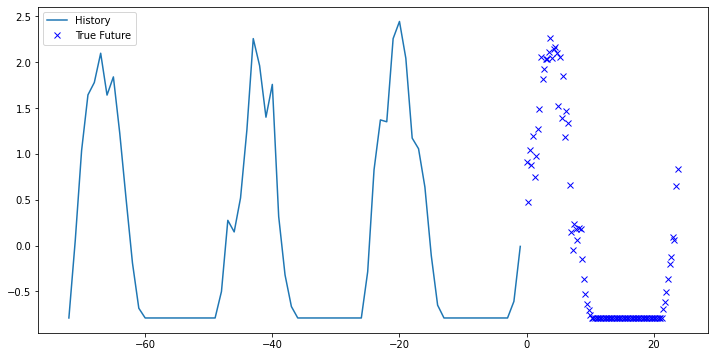

(256, 96, 1)


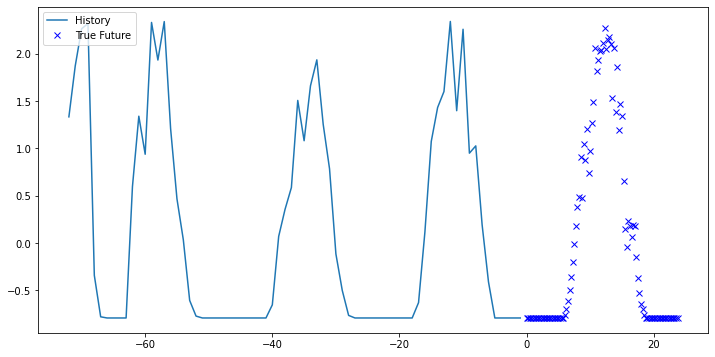

(256, 96, 1)


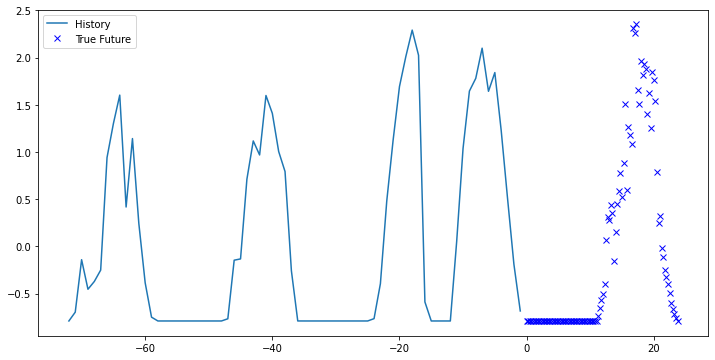

(256, 96, 1)


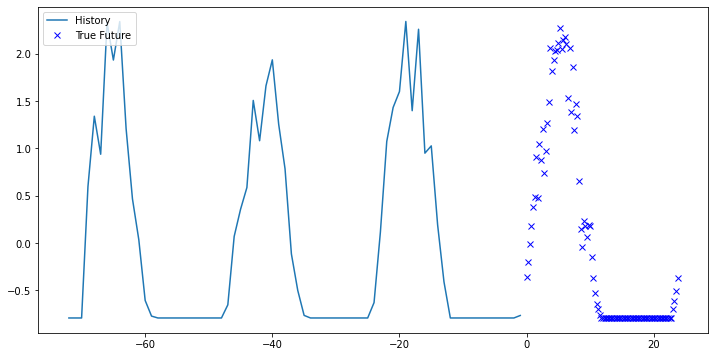

(256, 96, 1)


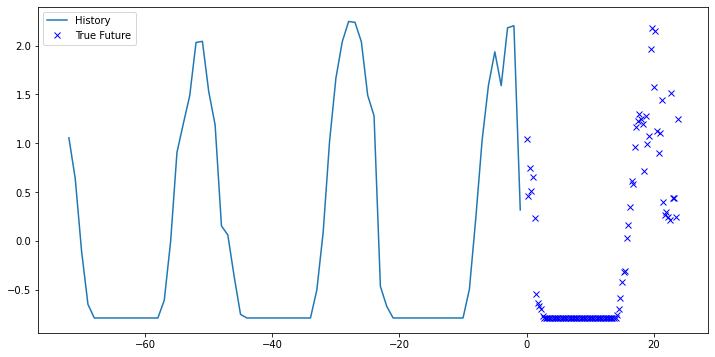

In [ ]:
for x, y in train_data_multi.take(5):
    multi_step_plot(x[0], y[0], np.array([0]))

In [ ]:
multi_step_solar_model = tf.keras.models.Sequential()
multi_step_solar_model.add(tf.keras.layers.LSTM(64,
                                          return_sequences=False,
                                          input_shape=x_train_multi.shape[-2:]))
multi_step_solar_model.add(tf.keras.layers.Dropout(0.25))
multi_step_solar_model.add(tf.keras.layers.Dense(96))


# create table with different errors to evaluate performance(mae and mse in particular)
# evaluate 100 times for exam
multi_step_solar_model.compile(optimizer=tf.keras.optimizers.RMSprop(clipvalue=1.0), loss='mae')
multi_step_solar_model


In [ ]:
for x, y in train_data_multi.take(1):
  print(np.array(x).shape)
  print(np.array(y).shape)
  print(multi_step_solar_model.predict(x).shape)

(256, 72, 1)
(256, 96, 1)
(256, 96)


In [ ]:
EPOCHS = 20
EVALUATION_INTERVAL = 200


multi_step_solar_history = multi_step_solar_model.fit(train_data_multi, epochs=EPOCHS,
                                          steps_per_epoch=EVALUATION_INTERVAL,
                                          validation_data=val_data_multi,
                                          validation_steps=100)
# multi_step_solar_history.evaluate()

Epoch 1/20
200/200 [==============================] - 29s 143ms/step - loss: 0.5125 - val_loss: 0.2756
Epoch 2/20
200/200 [==============================] - 29s 143ms/step - loss: 0.3902 - val_loss: 0.2049
Epoch 3/20
200/200 [==============================] - 28s 140ms/step - loss: 0.3646 - val_loss: 0.2197
Epoch 4/20
200/200 [==============================] - 28s 139ms/step - loss: 0.3510 - val_loss: 0.2230
Epoch 5/20
200/200 [==============================] - 29s 143ms/step - loss: 0.3394 - val_loss: 0.2147
Epoch 6/20
200/200 [==============================] - 29s 144ms/step - loss: 0.3296 - val_loss: 0.2106
Epoch 7/20
200/200 [==============================] - 28s 141ms/step - loss: 0.3206 - val_loss: 0.2172
Epoch 8/20
200/200 [==============================] - 28s 140ms/step - loss: 0.3136 - val_loss: 0.2287
Epoch 9/20
200/200 [==============================] - 28s 141ms/step - loss: 0.3066 - val_loss: 0.2261
Epoch 10/20
200/200 [==============================] - 29s 143ms/step - l

In [ ]:
# make 100 predictions using test input data

mc_predictions = []
for i in tqdm(range(100)):
    for x, y in test_data_multi.take(1):
      y_predict = multi_step_solar_model.predict(x)
      mc_predictions.append(y_predict)

print(np.array(mc_predictions).shape)




  0%|          | 0/100 [00:00<?, ?it/s]

  1%|          | 1/100 [00:00<00:43,  2.26it/s]

  2%|▏         | 2/100 [00:00<00:33,  2.90it/s]

  3%|▎         | 3/100 [00:00<00:26,  3.62it/s]

  4%|▍         | 4/100 [00:00<00:21,  4.40it/s]

  5%|▌         | 5/100 [00:00<00:18,  5.13it/s]

  6%|▌         | 6/100 [00:01<00:16,  5.77it/s]

  7%|▋         | 7/100 [00:01<00:14,  6.40it/s]

  8%|▊         | 8/100 [00:01<00:13,  6.75it/s]

  9%|▉         | 9/100 [00:01<00:12,  7.22it/s]

 10%|█         | 10/100 [00:01<00:11,  7.53it/s]

 11%|█         | 11/100 [00:01<00:11,  7.95it/s]

 12%|█▏        | 12/100 [00:01<00:10,  8.15it/s]

 13%|█▎        | 13/100 [00:01<00:10,  8.41it/s]

 14%|█▍        | 14/100 [00:01<00:10,  8.37it/s]

 15%|█▌        | 15/100 [00:02<00:10,  8.43it/s]

 16%|█▌        | 16/100 [00:02<00:09,  8.59it/s]

 17%|█▋        | 17/100 [00:02<00:09,  8.51it/s]

 18%|█▊        | 18/100 [00:02<00:09,  8.66it/s]

 19%|█▉        | 19/100 [00:02<00:09,  8.57it/s]

 20%|██        |

(100, 248, 96)


100 scores for predicted vs true values:
 [0.87692096 0.8712079  0.85840677 0.87861598 0.8867889  0.88345224
 0.87571164 0.89257418 0.88815685 0.88520264 0.90249157 0.91212799
 0.90886028 0.90632593 0.90659485 0.90483317 0.8874627  0.86004415
 0.82822468 0.78662219 0.73074957 0.75168212 0.76173329 0.74619277
 0.69859511 0.75274962 0.76381317 0.72346923 0.66534199 0.73950075
 0.75702082 0.75193276 0.70935498 0.77311609 0.77375151 0.75092515
 0.71356419 0.76023007 0.76324102 0.74661584 0.7199146  0.7608446
 0.78168607 0.76143219 0.74447111 0.78247038 0.8081836  0.7788494
 0.7515111  0.78672802 0.80874741 0.77021033 0.74161243 0.78925559
 0.80334003 0.76273836 0.76288942 0.80081747 0.80396671 0.7746363
 0.78431996 0.80168922 0.79564809 0.76600573 0.76308772 0.79198503
 0.78732382 0.75537693 0.73460216 0.79963156 0.79876626 0.76506015
 0.71996532 0.80809078 0.80666629 0.7723922  0.70842645 0.80174081
 0.79793405 0.76224749 0.67788257 0.79153339 0.79211745 0.76097572
 0.67821617 0.79769656 

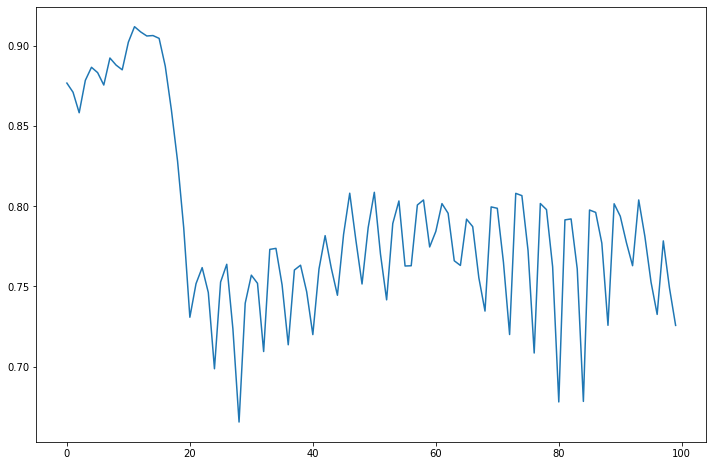

In [ ]:
from sklearn.metrics import r2_score

# get the coefficient of determination across all predictions made compared to true values 
# we are looking at 100 predictions made for one batch of inputs and thus compared to one batch of outputs 
r2_scores = []

i = 0
for y_pred in mc_predictions:
  score = r2_score(y_test_multi[i], y_pred[i])
  r2_scores.append(score)
  i+=1

x = [i for i in range(100)]

print('100 scores for predicted vs true values:\n {}'.format(np.array(r2_scores)))
print(np.array(r2_scores).mean())
plt.plot(x, r2_scores)
plt.show()

100 MSE scores for predicted vs true values:
 [0.19198887 0.20423702 0.26154039 0.21055961 0.16998153 0.18297978
 0.24561485 0.19769068 0.15980617 0.17709227 0.21107092 0.15129272
 0.13435805 0.1280847  0.12423796 0.09773607 0.15475386 0.17661068
 0.16320201 0.17015895 0.21958234 0.28245089 0.29210731 0.30004039
 0.24583059 0.26490565 0.33228415 0.31939246 0.25431445 0.2656689
 0.3060126  0.27150653 0.24987624 0.26041517 0.28002083 0.26398975
 0.25641262 0.26893447 0.28386757 0.26709202 0.25431203 0.2677425
 0.28661933 0.26699884 0.25070911 0.26405355 0.28755129 0.27328451
 0.26531139 0.28229708 0.31192008 0.30619377 0.31094172 0.32586237
 0.35659993 0.35388444 0.37204232 0.38965733 0.40547918 0.41296161
 0.46054405 0.48127052 0.46911422 0.48767834 0.54909879 0.55204301
 0.51078751 0.52192469 0.57384657 0.52283826 0.47876735 0.45039591
 0.52182225 0.36967712 0.39192834 0.29007262 0.39087146 0.1702205
 0.26020467 0.17390887 0.27474936 0.14163407 0.16614324 0.17523254
 0.2285264  0.15937

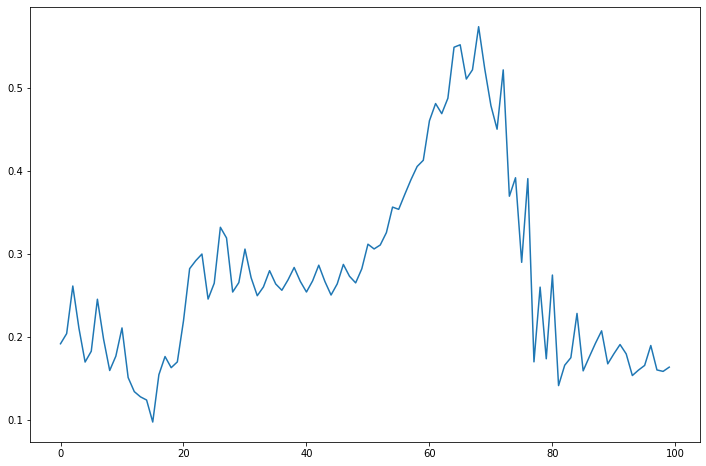

In [ ]:
from sklearn.metrics import mean_squared_error

mse_scores = []

i = 0
for y_pred in mc_predictions:
  score = mean_squared_error(y_test_multi[i], y_pred[i])
  mse_scores.append(score)
  i+=1

x = [i for i in range(100)]

print('100 MSE scores for predicted vs true values:\n {}'.format(np.array(mse_scores)))
print(np.array(mse_scores).mean())
plt.plot(x, mse_scores)
plt.show()

100 MSE scores for predicted vs true values:
 [0.35342188 0.36288891 0.40612343 0.36080476 0.32708308 0.34278093
 0.39255509 0.34136563 0.30250874 0.32471006 0.36177648 0.30119033
 0.26083389 0.25862938 0.29307576 0.25194001 0.23761823 0.24794078
 0.27121753 0.24366652 0.2788811  0.32087781 0.33076244 0.33022482
 0.29684431 0.31479285 0.35369431 0.34679384 0.32454416 0.33739425
 0.35110387 0.33768076 0.34867005 0.3571257  0.35913432 0.34721709
 0.34759753 0.35167937 0.35244894 0.33270138 0.33106221 0.34624276
 0.35950057 0.33447002 0.33022629 0.34815082 0.36494489 0.34328284
 0.3464543  0.36713569 0.38905921 0.38106586 0.40934758 0.42914181
 0.44458785 0.44096675 0.46903202 0.48507597 0.4911045  0.48940079
 0.52540354 0.53994596 0.52909932 0.53010827 0.56843158 0.57101545
 0.54522944 0.54704306 0.57433811 0.55519035 0.5248921  0.50098364
 0.54783667 0.45997012 0.45729676 0.36078579 0.48186543 0.28464697
 0.34044349 0.28823121 0.39202504 0.29235246 0.29985838 0.32842044
 0.346718   0.32

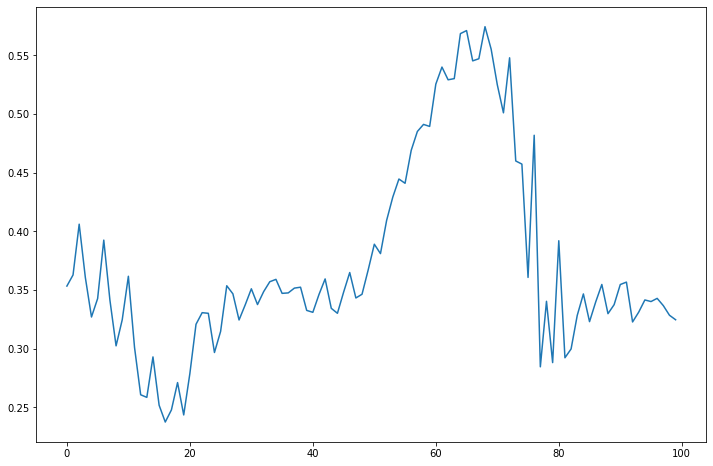

In [ ]:
from sklearn.metrics import mean_absolute_error

mae_scores = []

i = 0
for y_pred in mc_predictions:
  score = mean_absolute_error(y_test_multi[i], y_pred[i])
  mae_scores.append(score)
  i+=1

x = [i for i in range(100)]

print('100 MSE scores for predicted vs true values:\n {}'.format(np.array(mae_scores)))
print(np.array(mae_scores).mean())
plt.plot(x, mae_scores)
plt.show()

In [ ]:
multi_step_solar_model.evaluate(test_data_multi, steps=200)

200/200 [==============================] - 9s 46ms/step - loss: 0.0395


0.039529647678136826

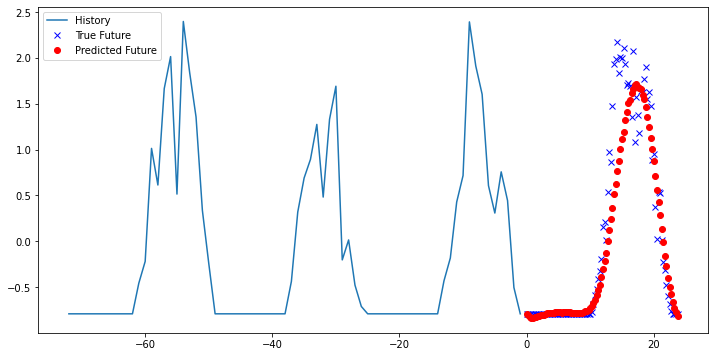

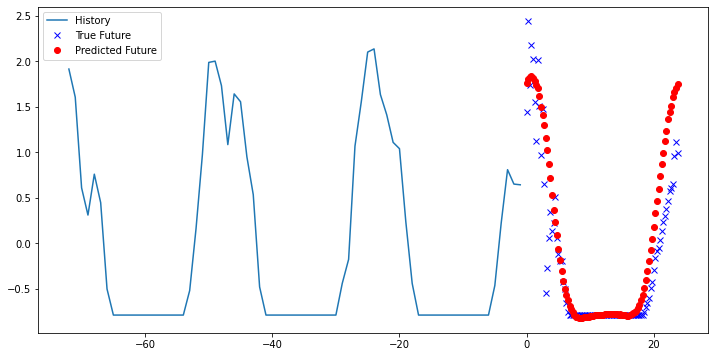

In [ ]:
for x, y in val_data_multi.take(2):
  multi_step_plot(x[0], y[0], multi_step_solar_model.predict(x)[0])

100


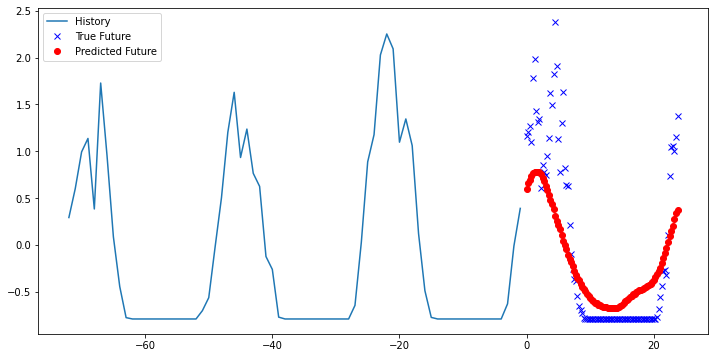

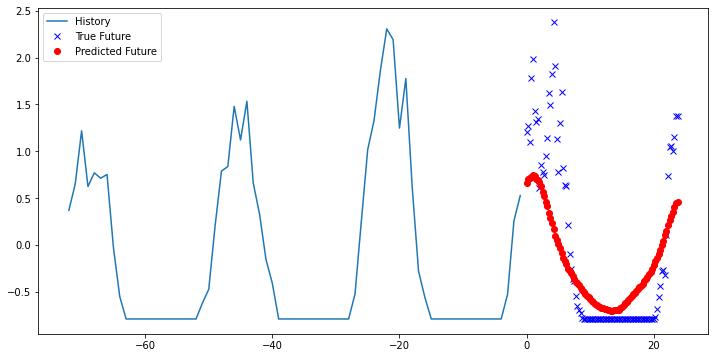

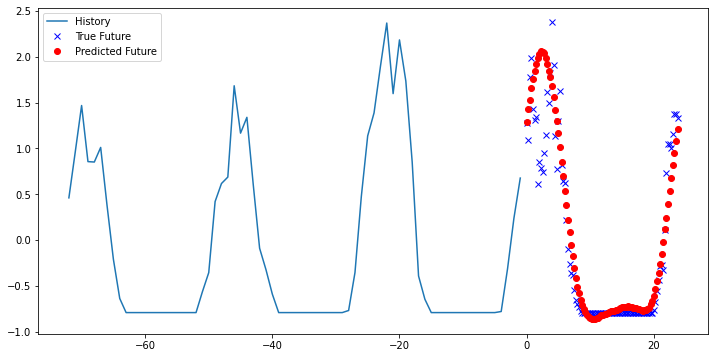

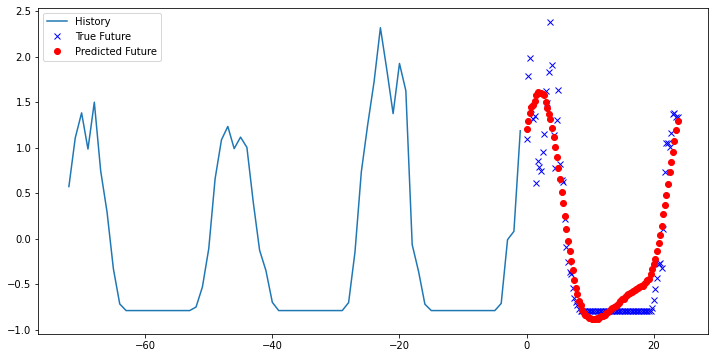

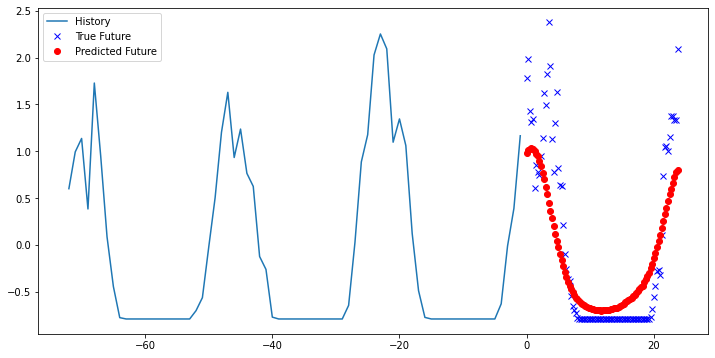

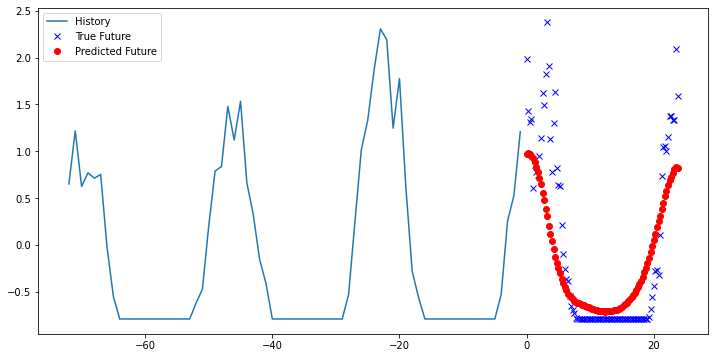

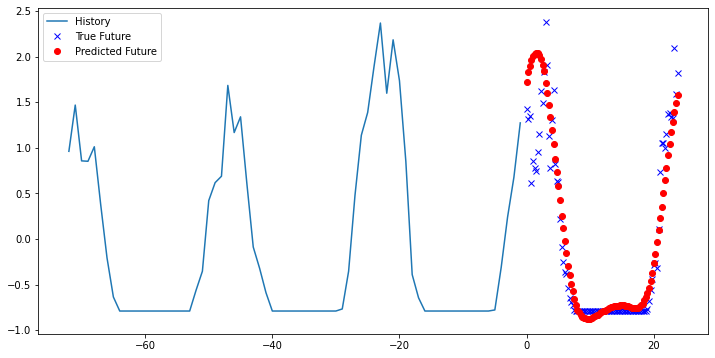

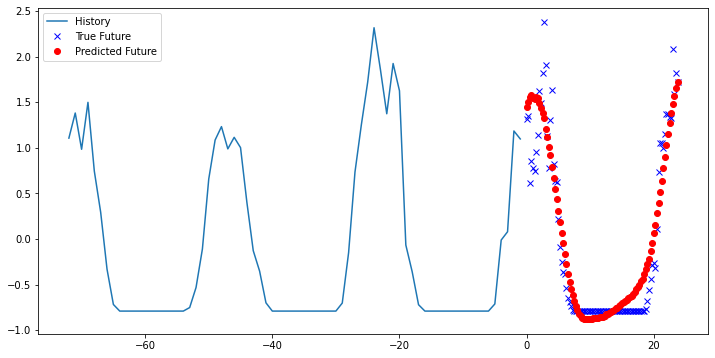

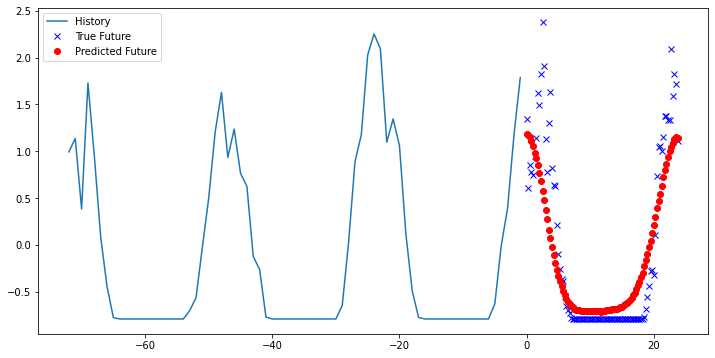

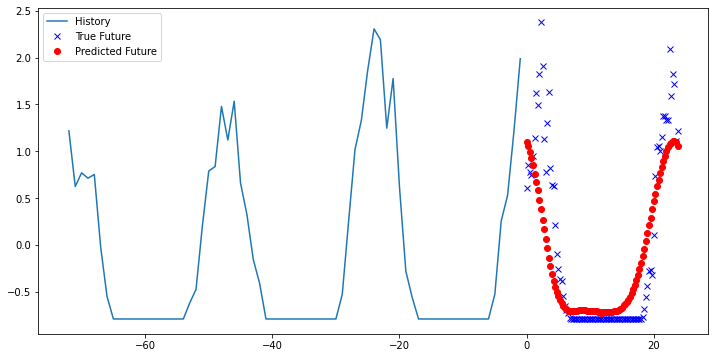

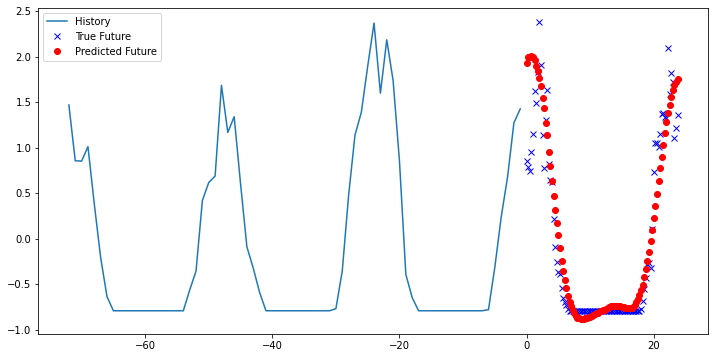

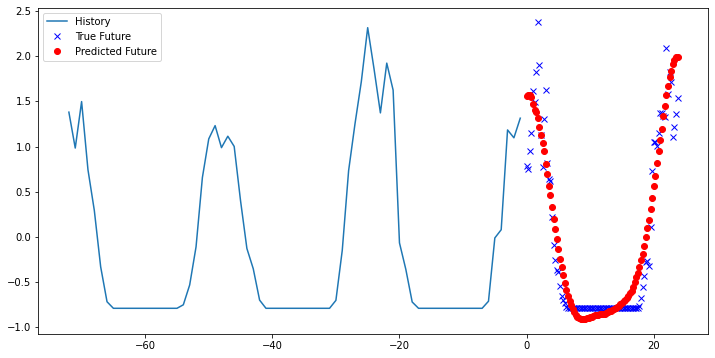

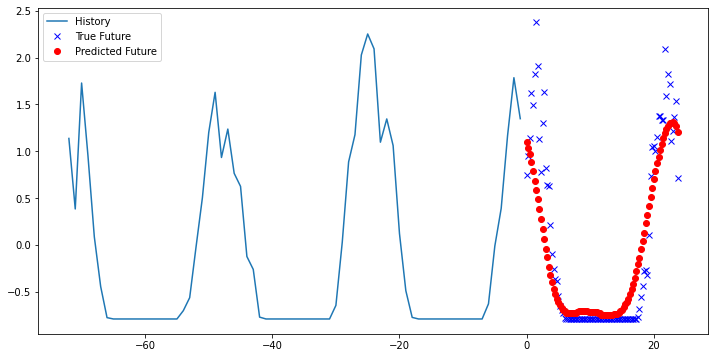

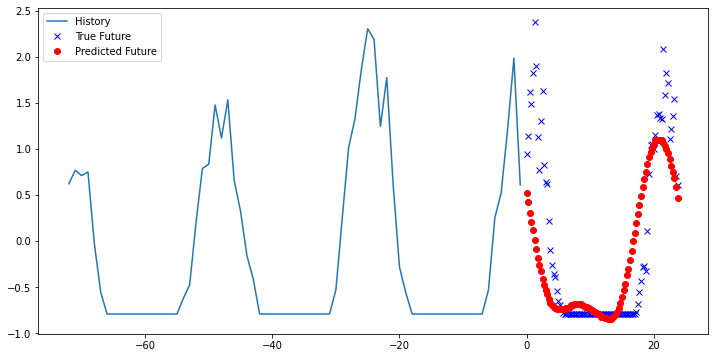

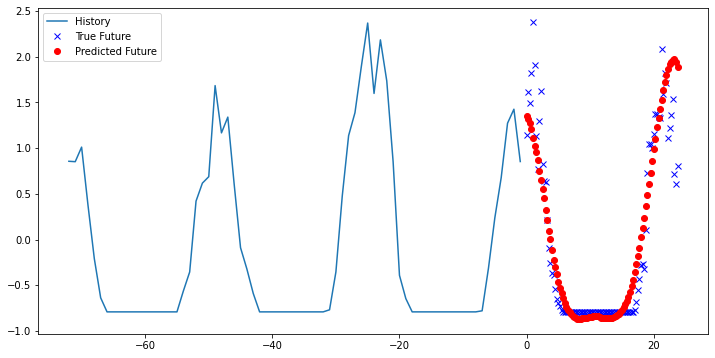

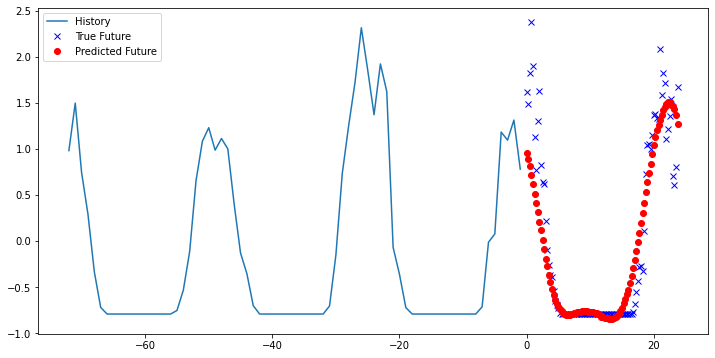

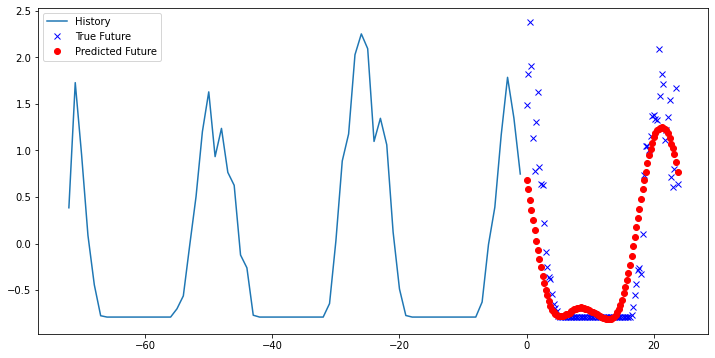

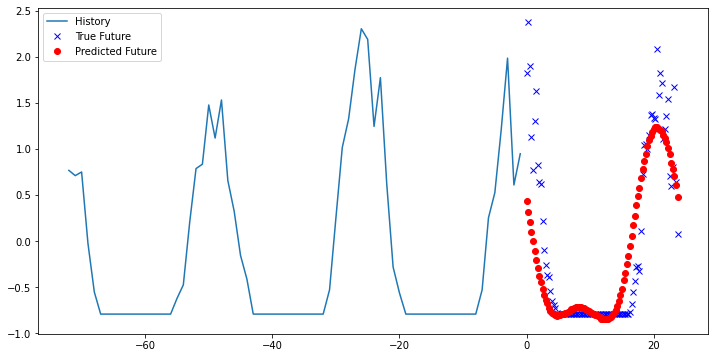

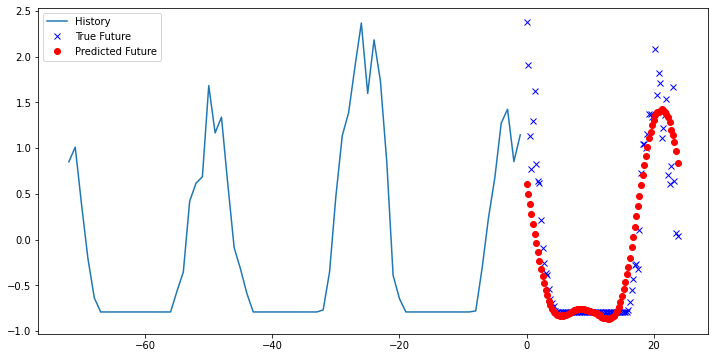

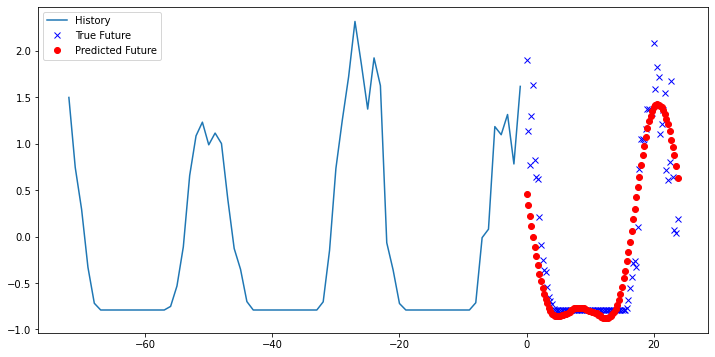

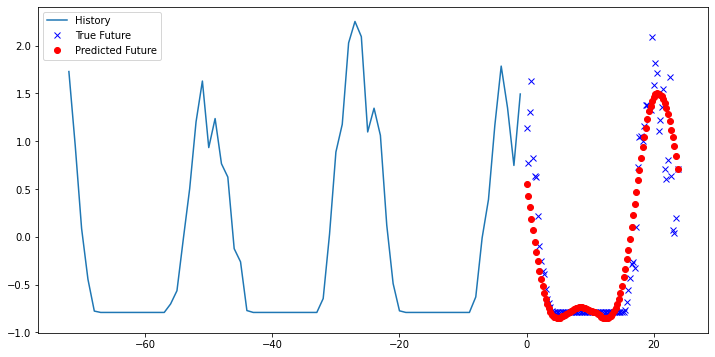

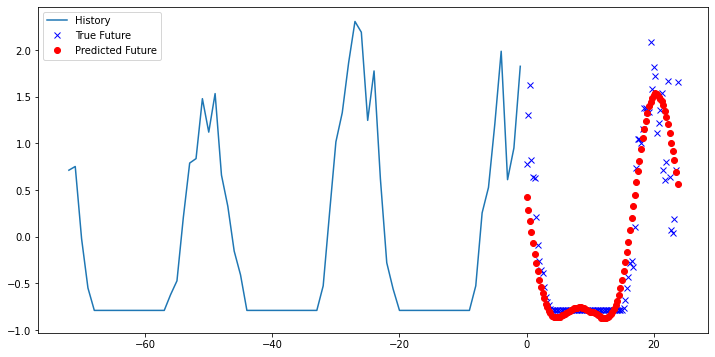

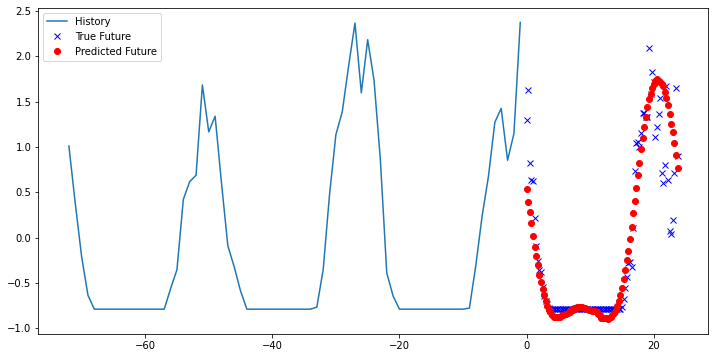

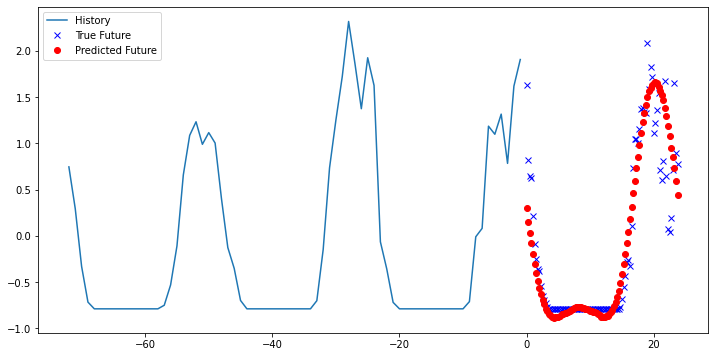

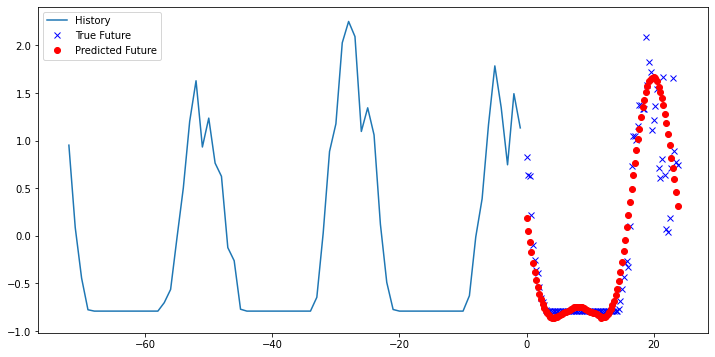

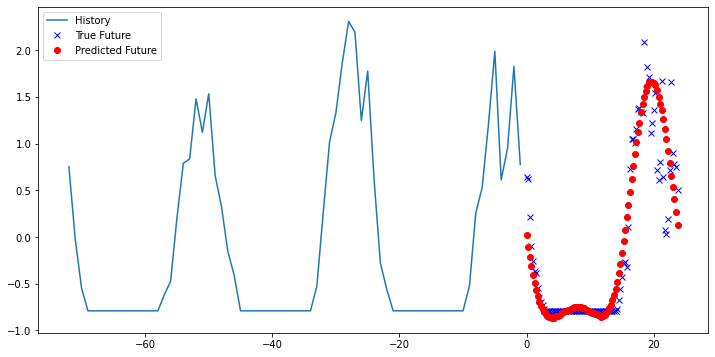

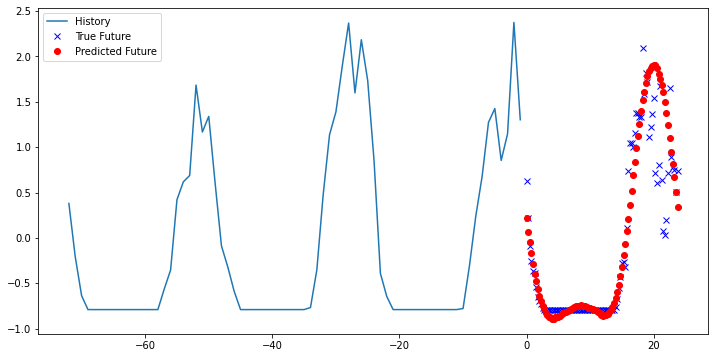

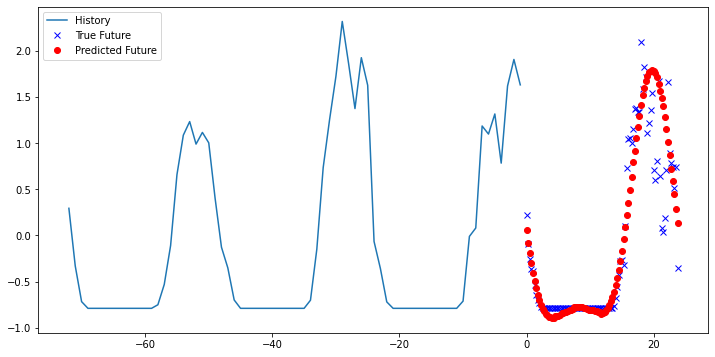

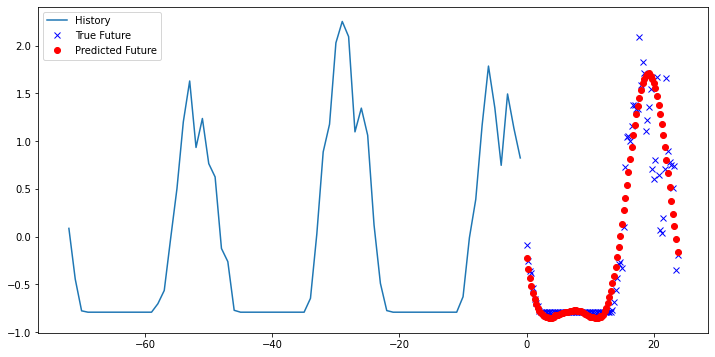

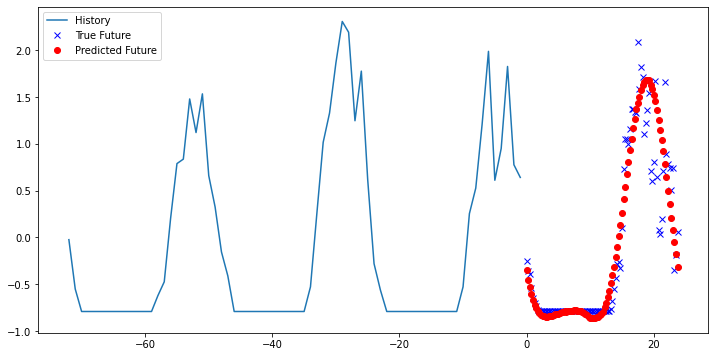

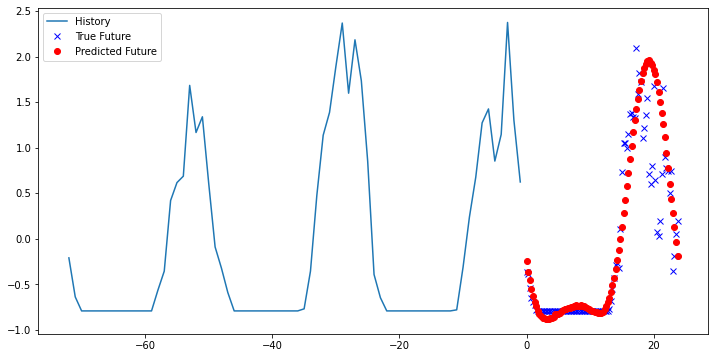

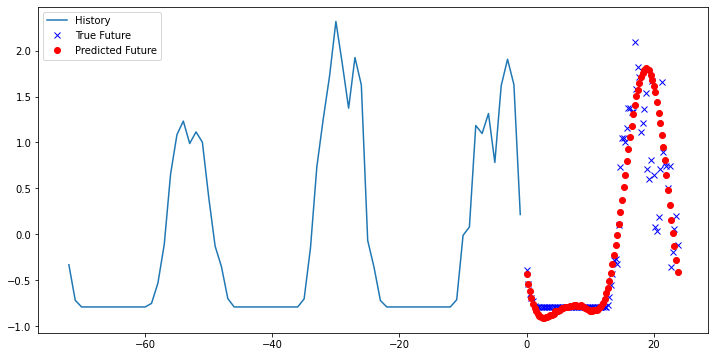

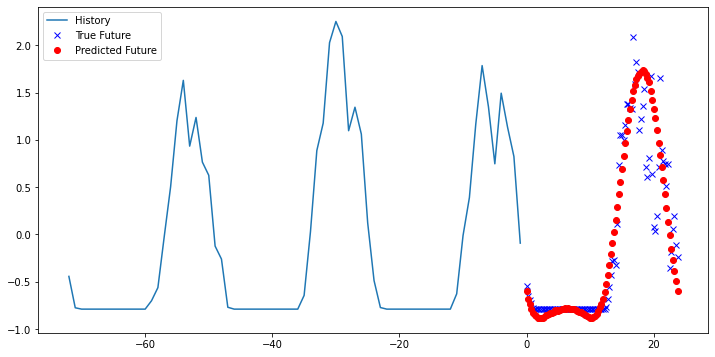

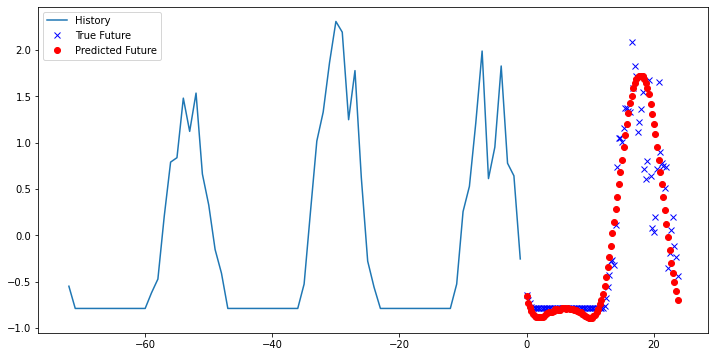

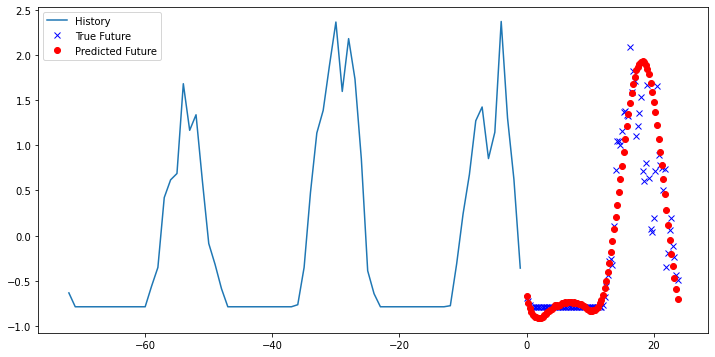

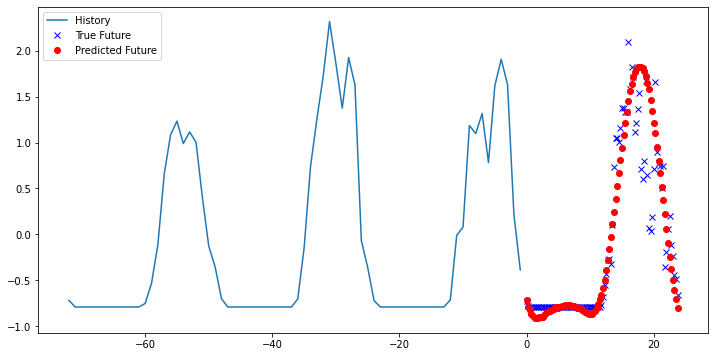

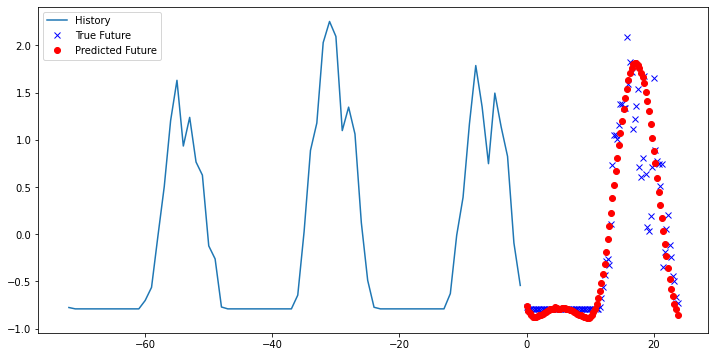

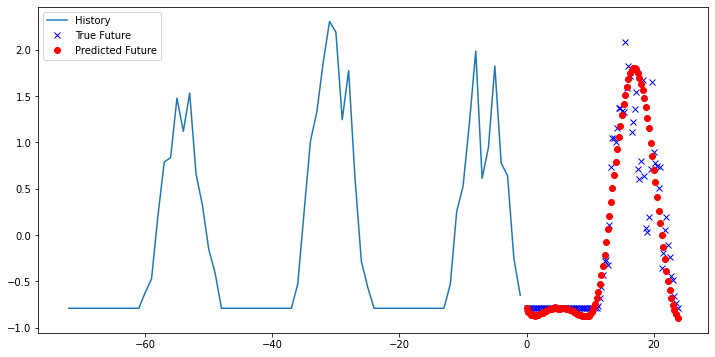

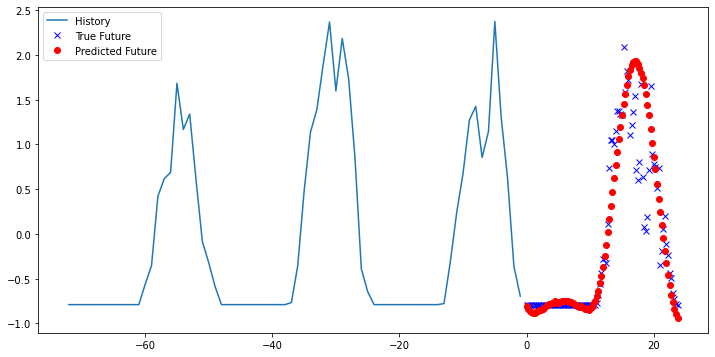

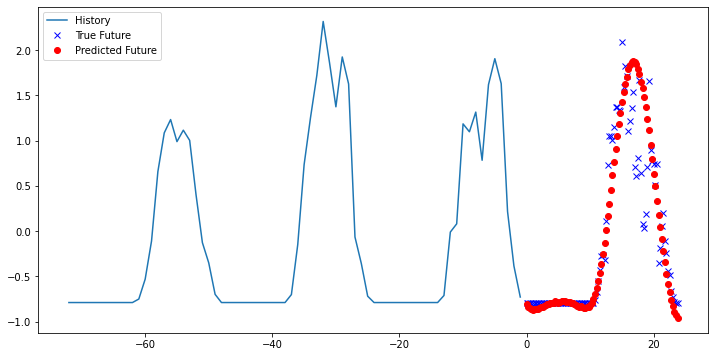

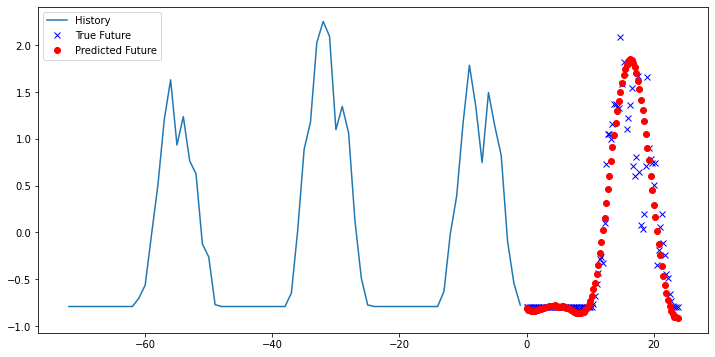

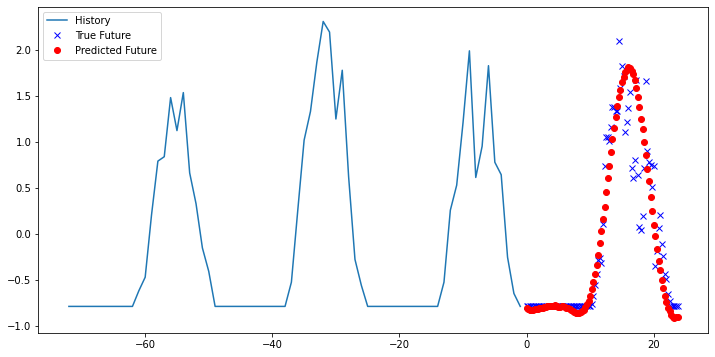

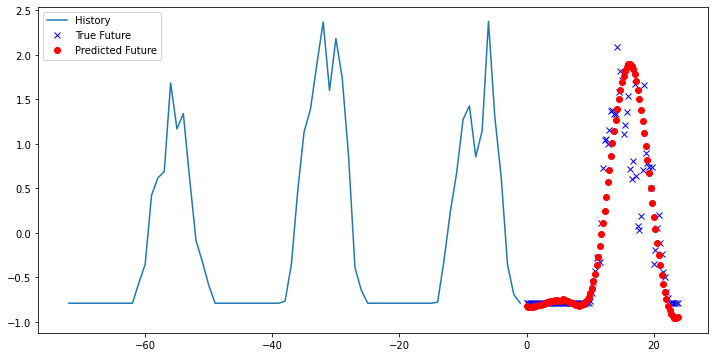

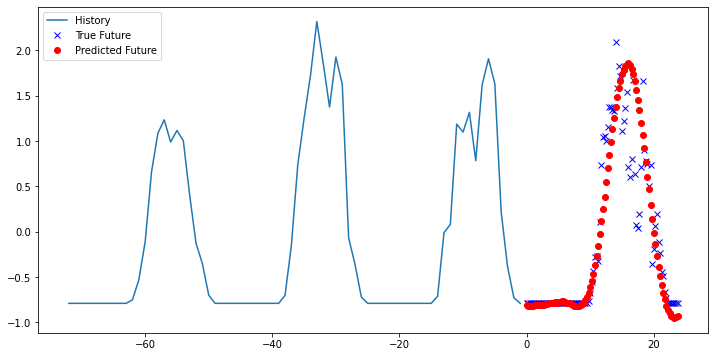

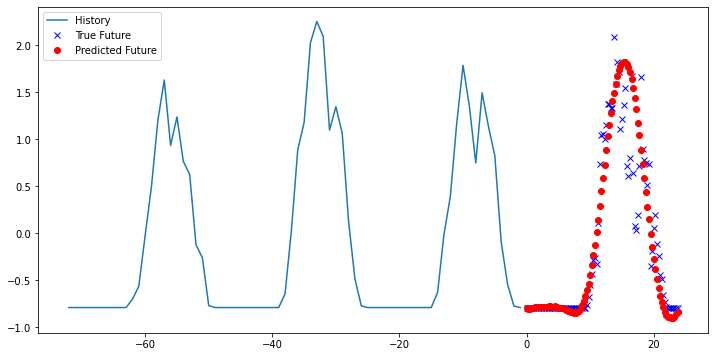

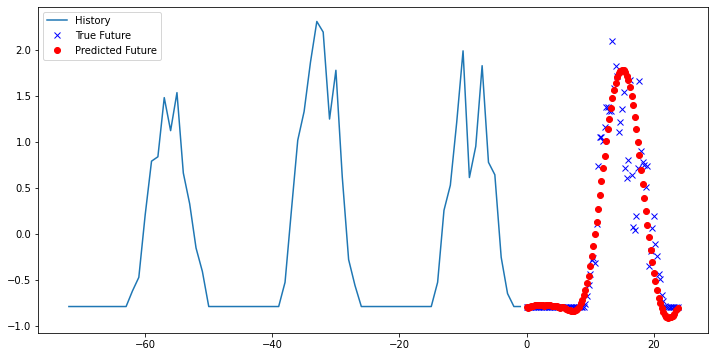

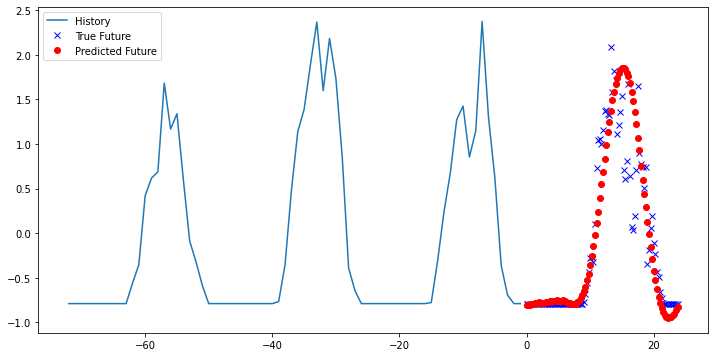

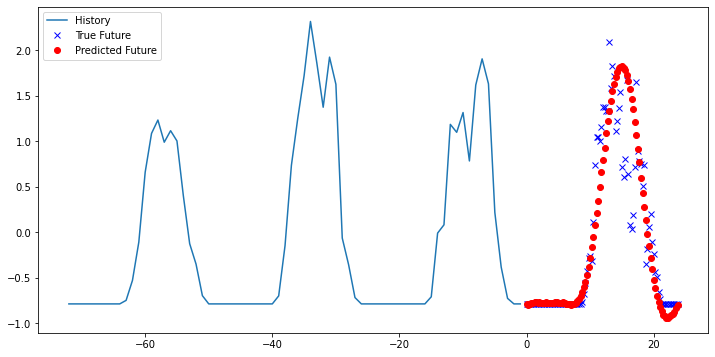

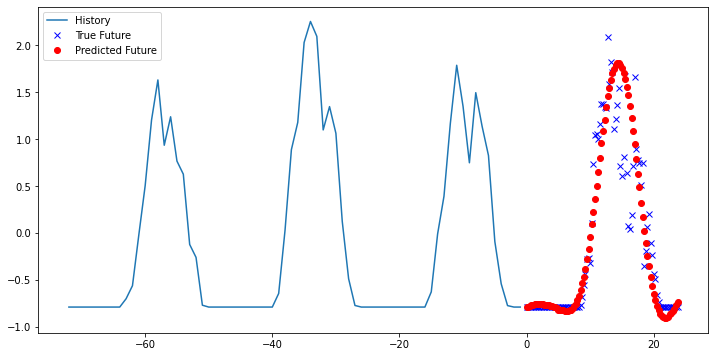

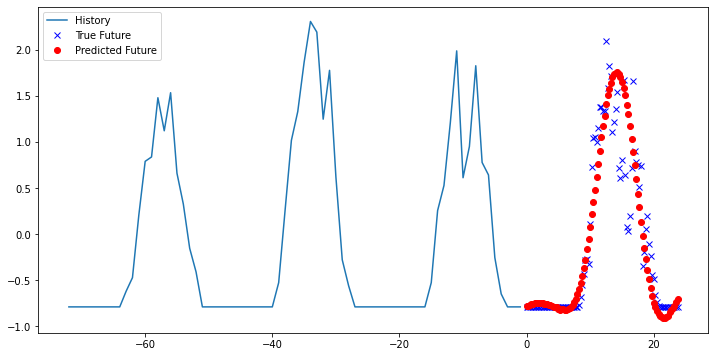

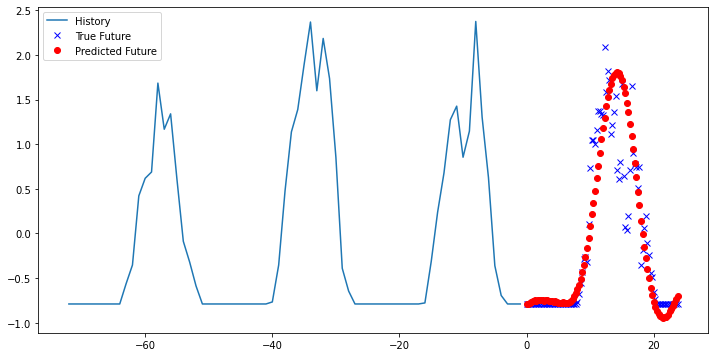

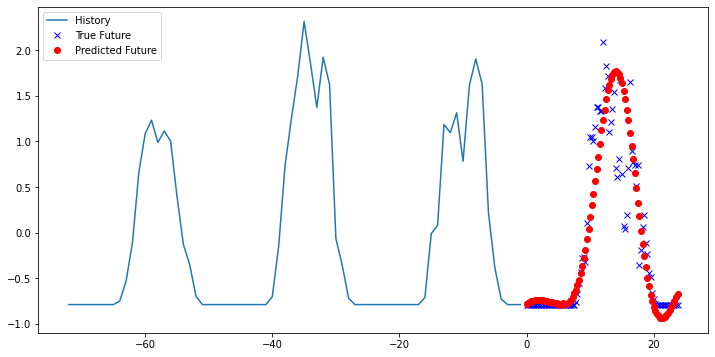

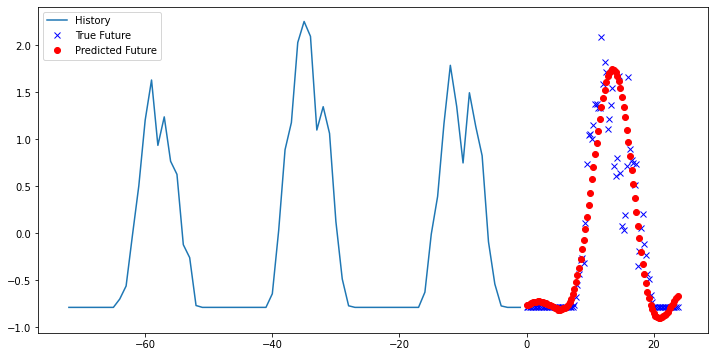

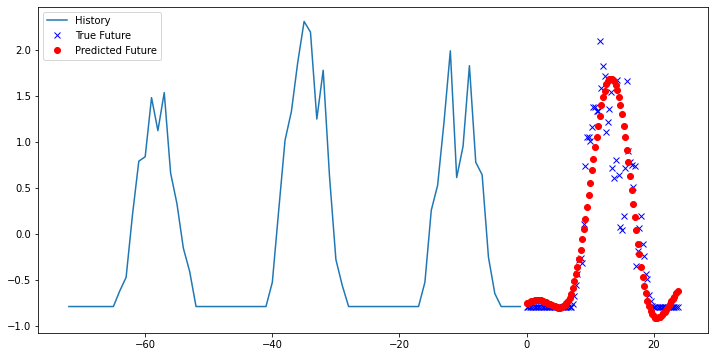

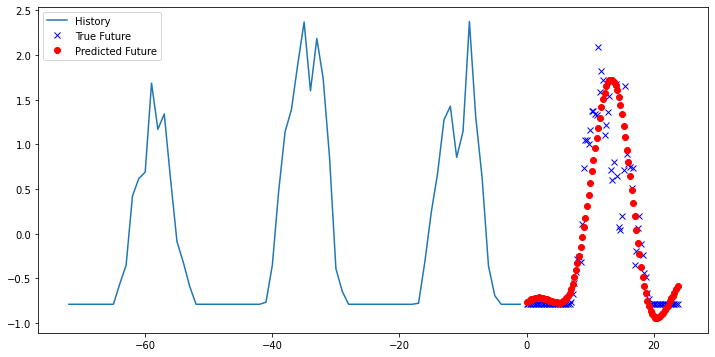

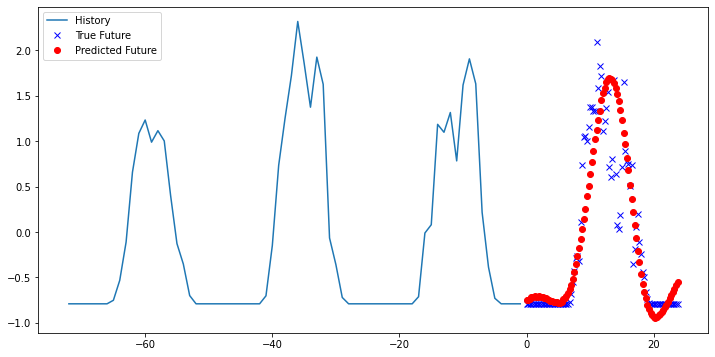

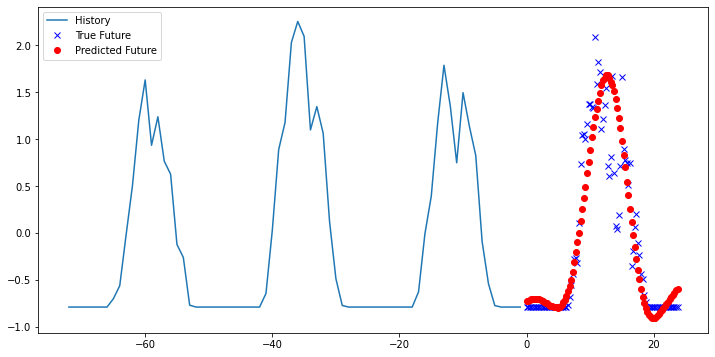

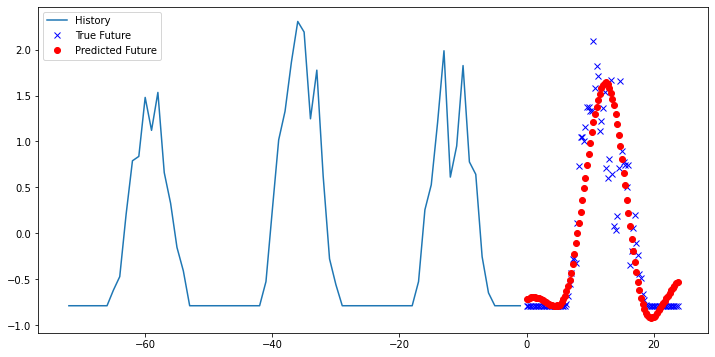

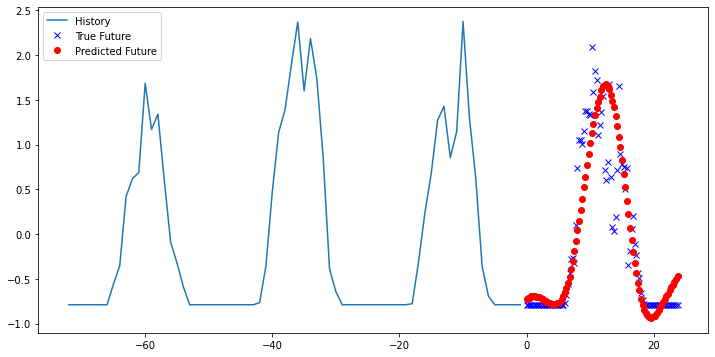

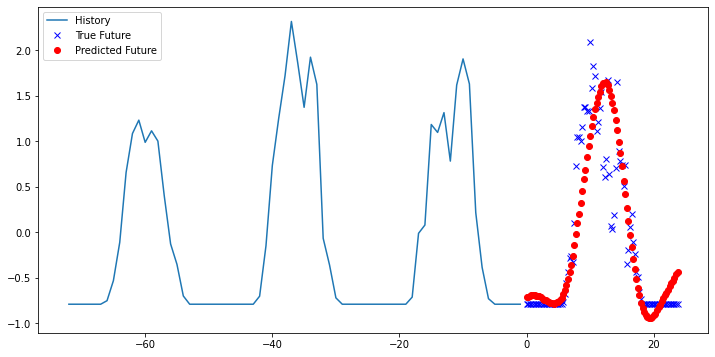

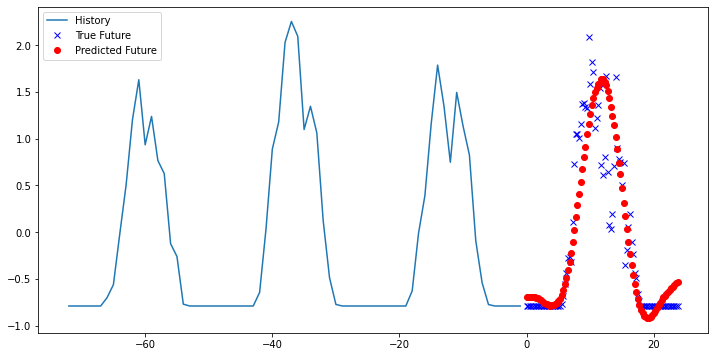

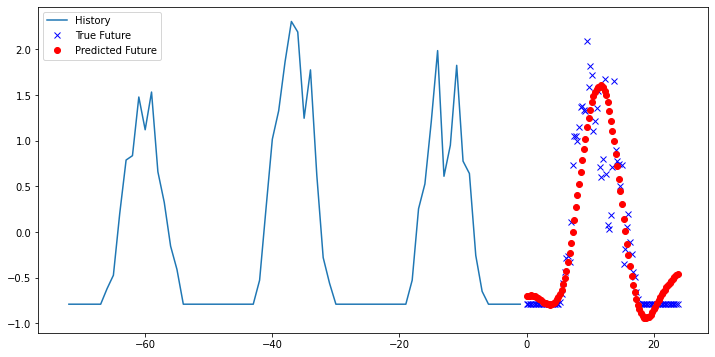

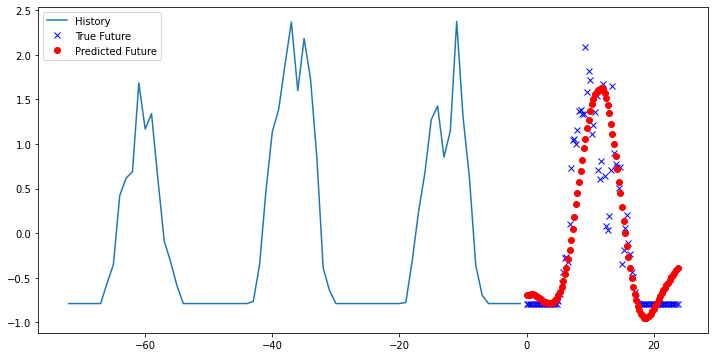

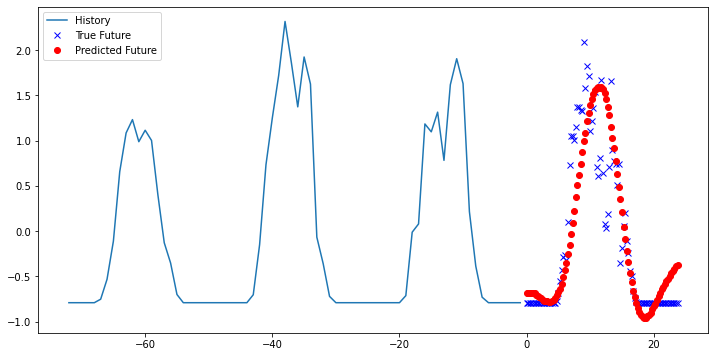

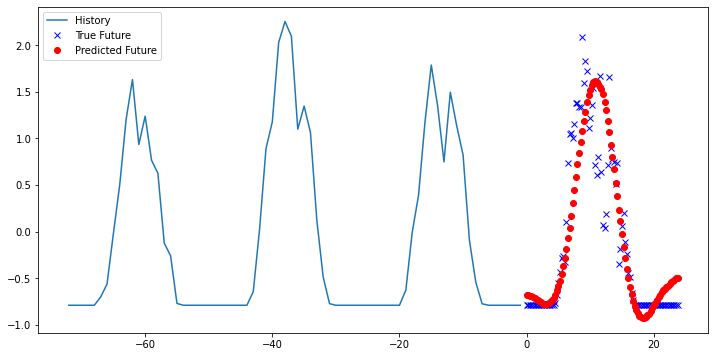

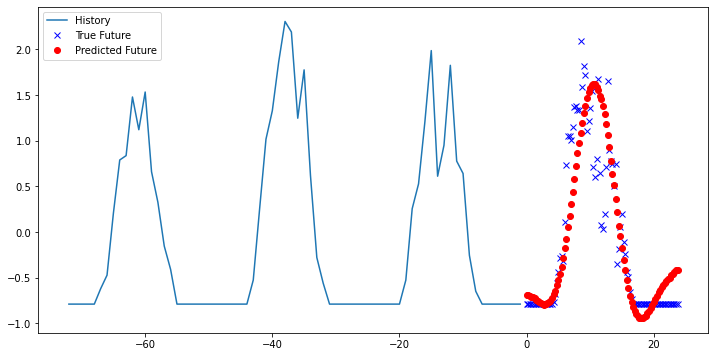

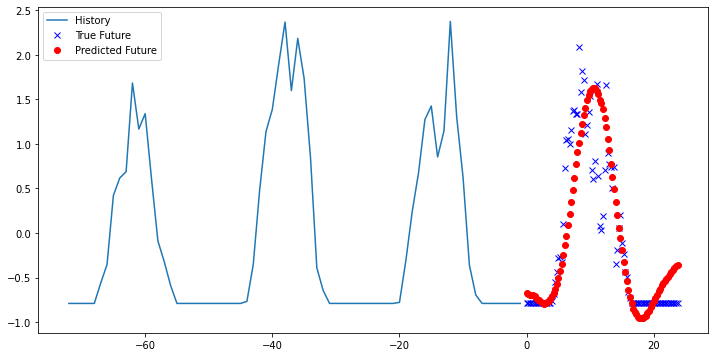

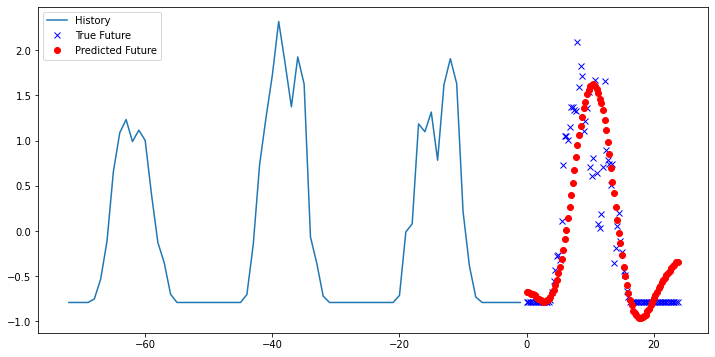

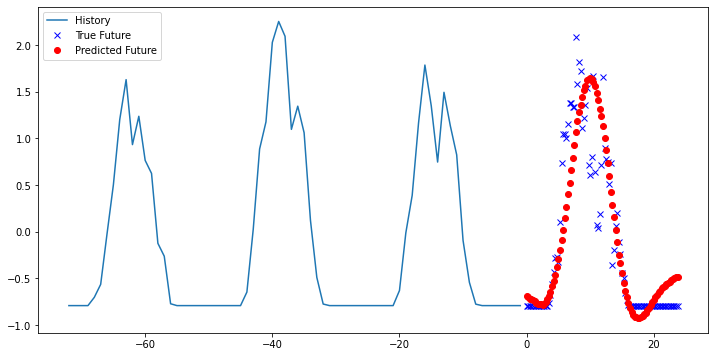

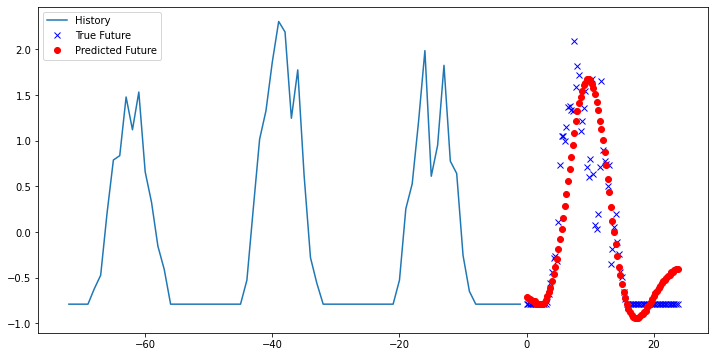

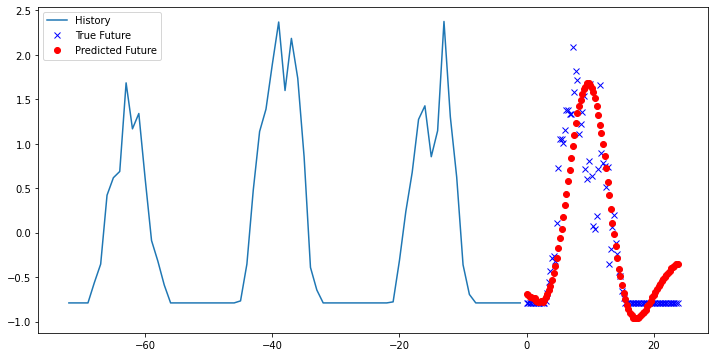

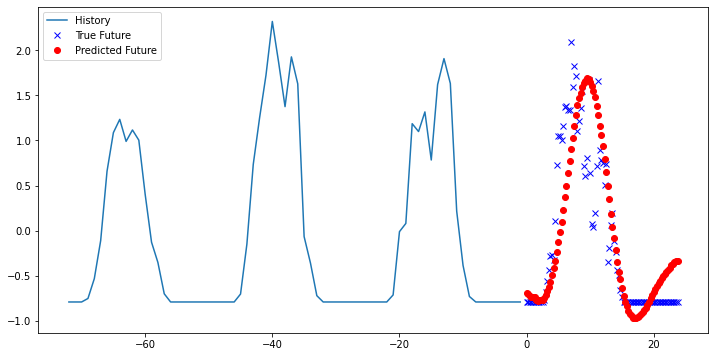

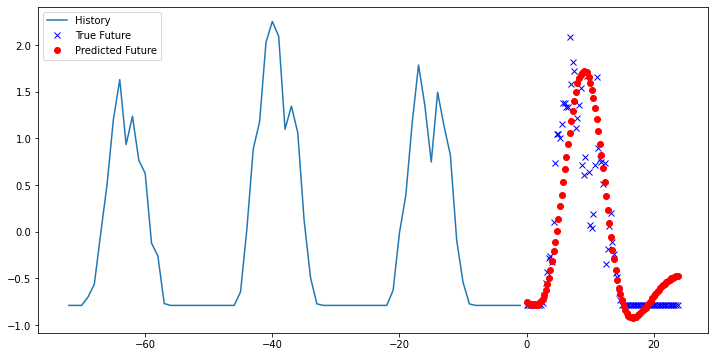

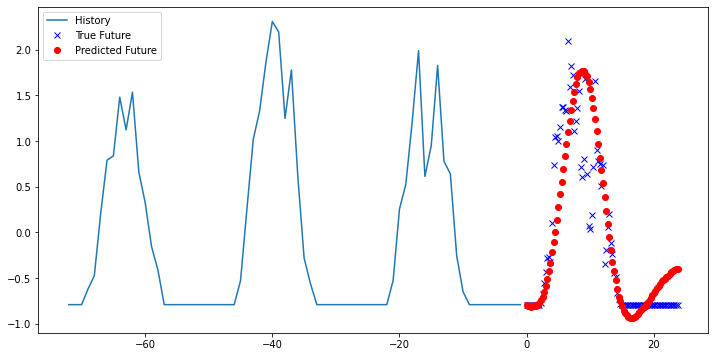

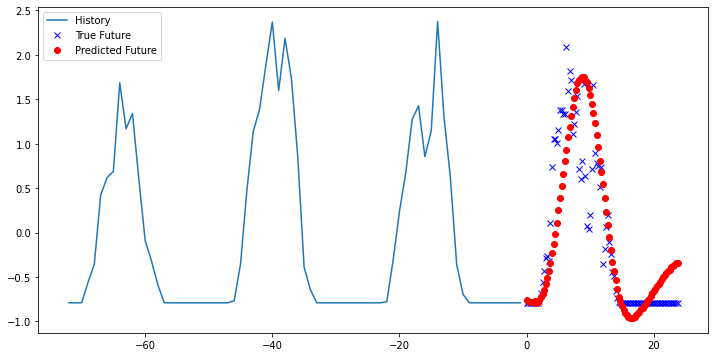

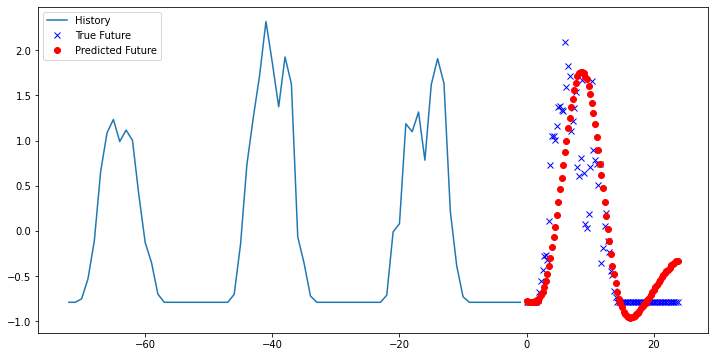

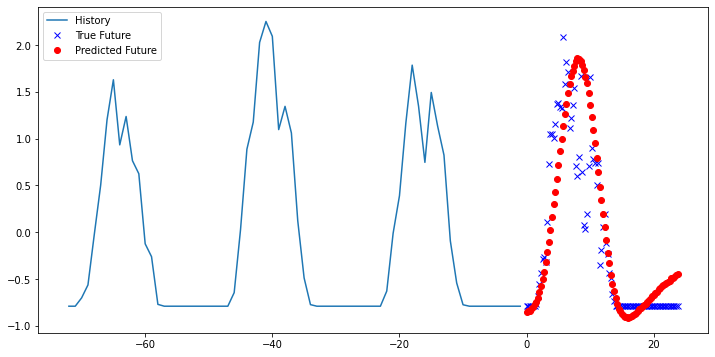

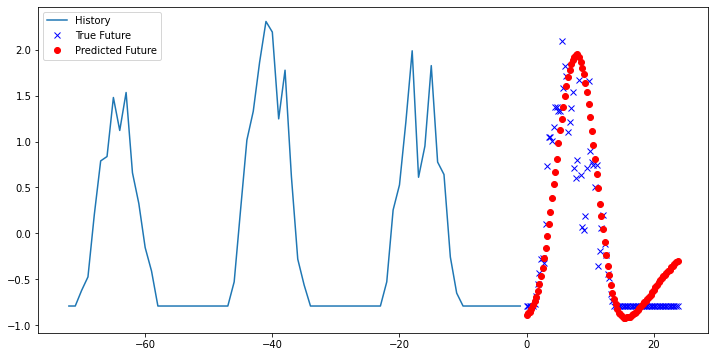

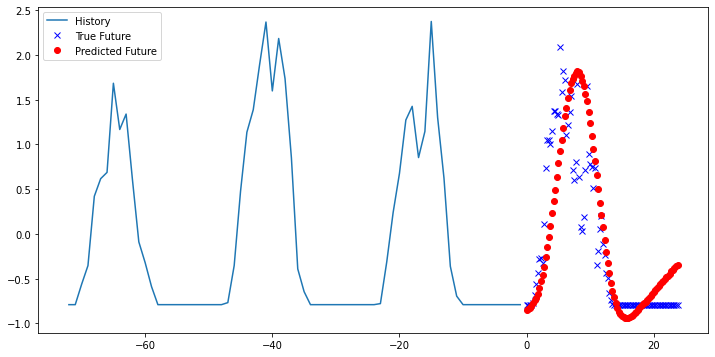

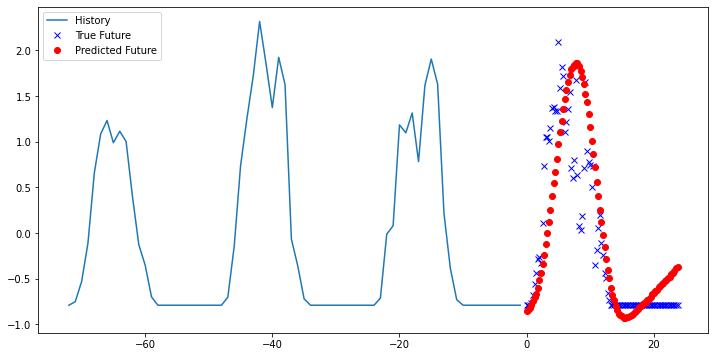

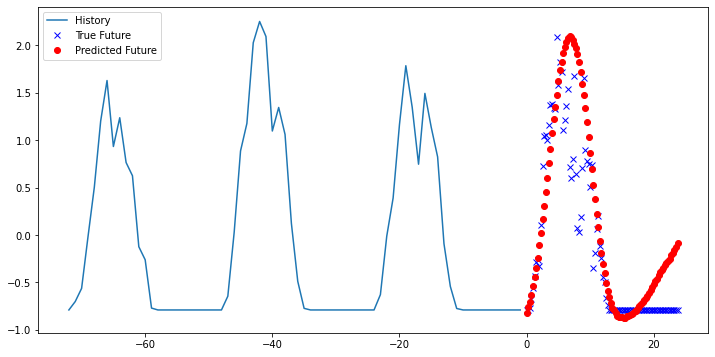

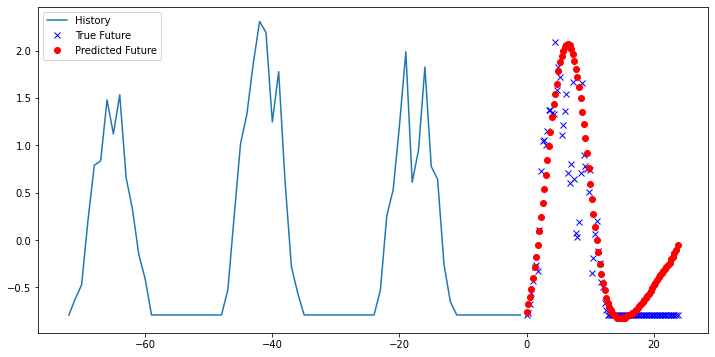

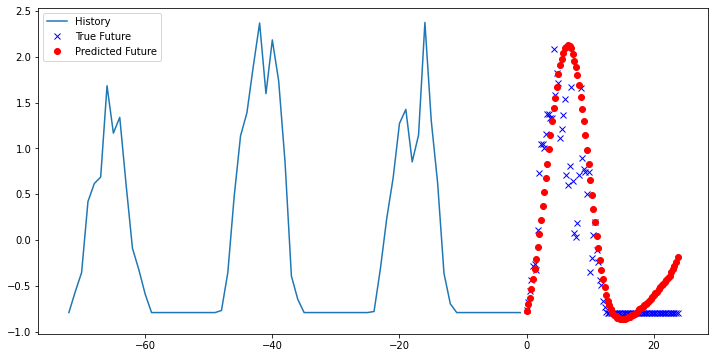

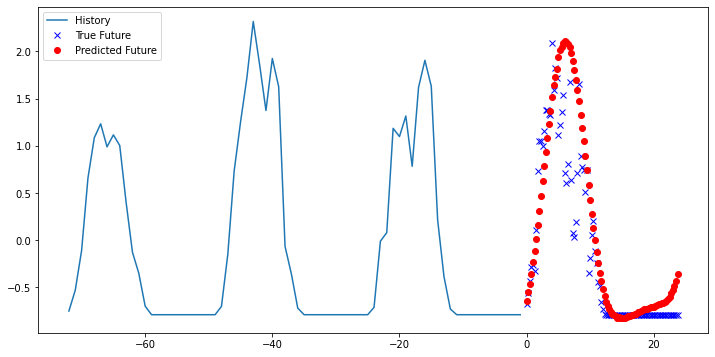

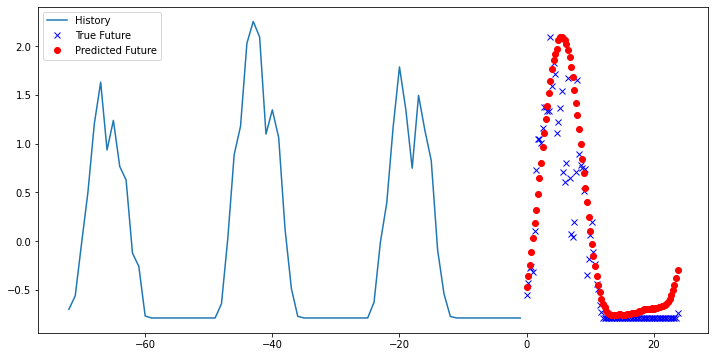

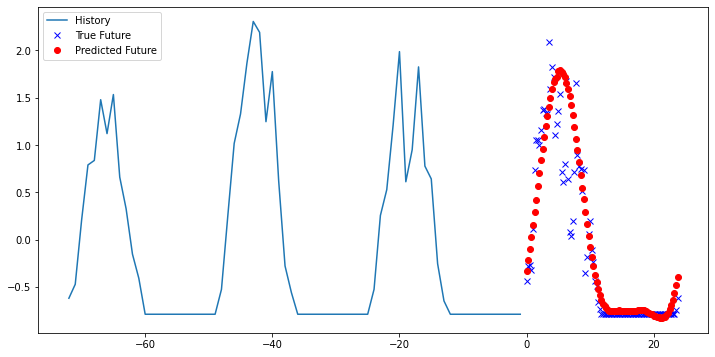

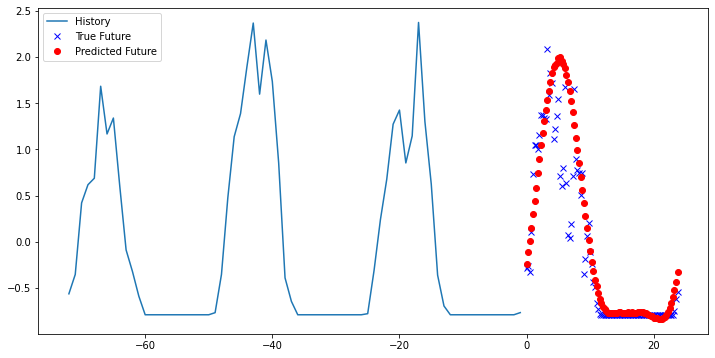

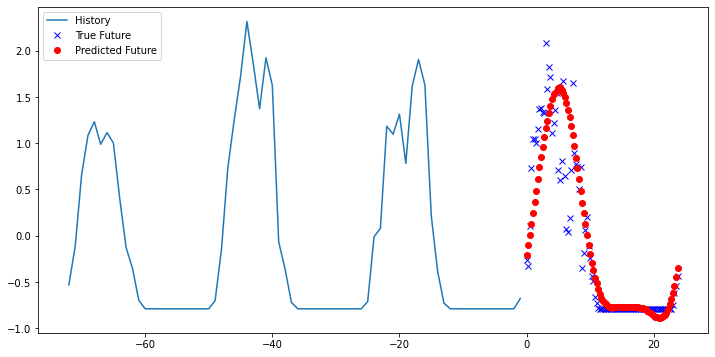

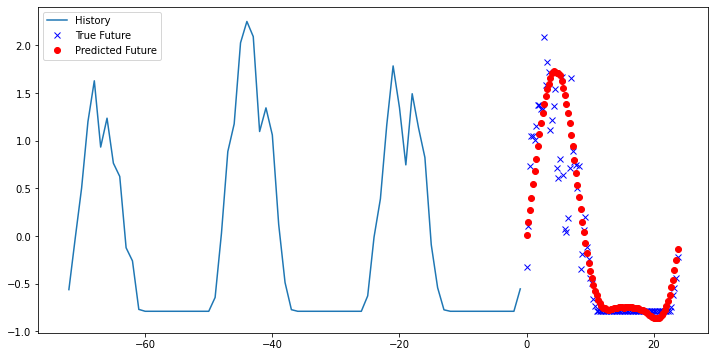

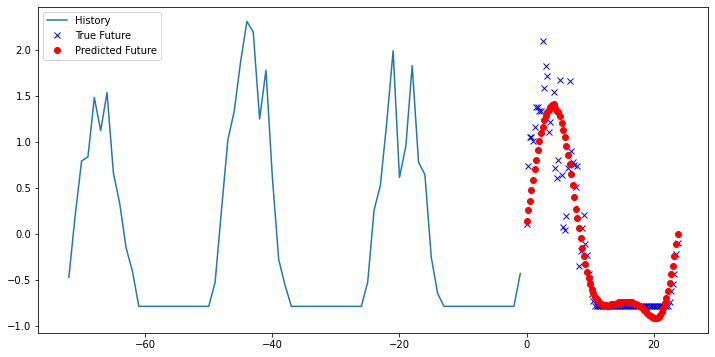

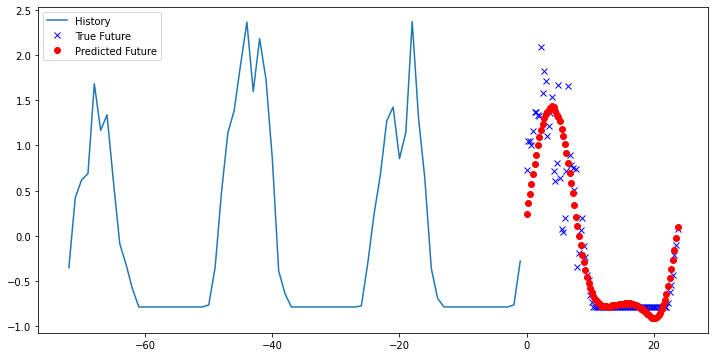

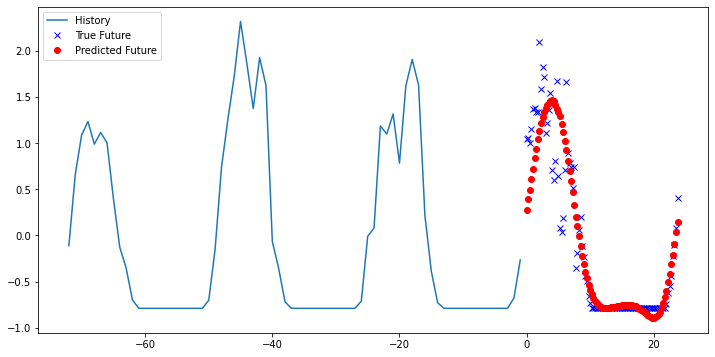

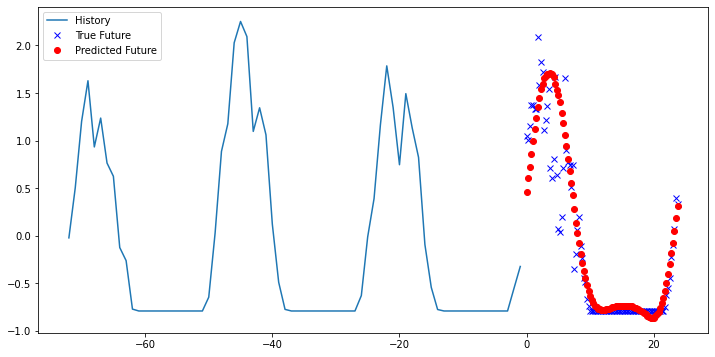

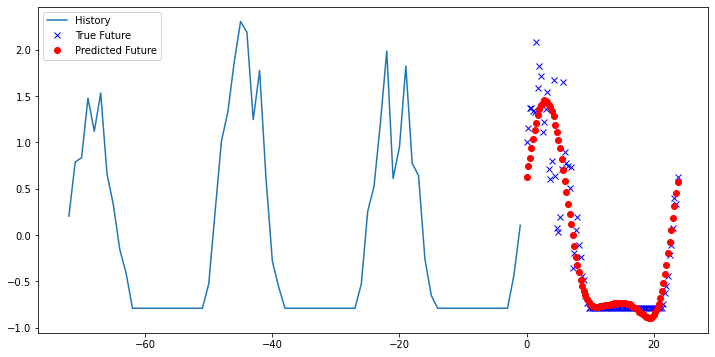

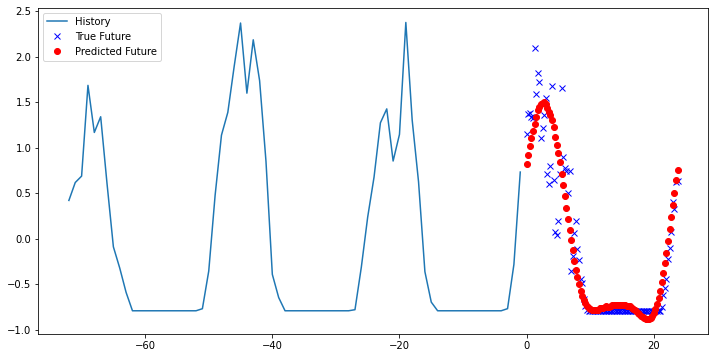

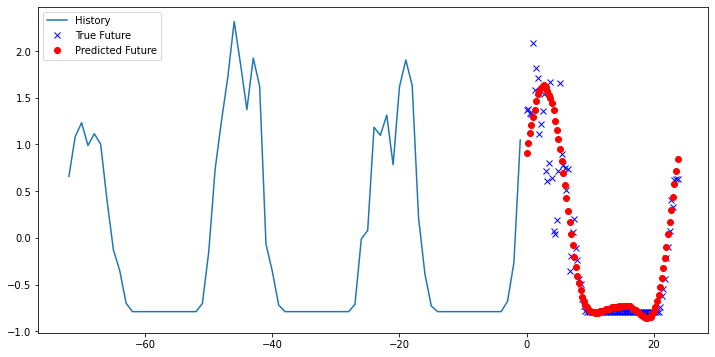

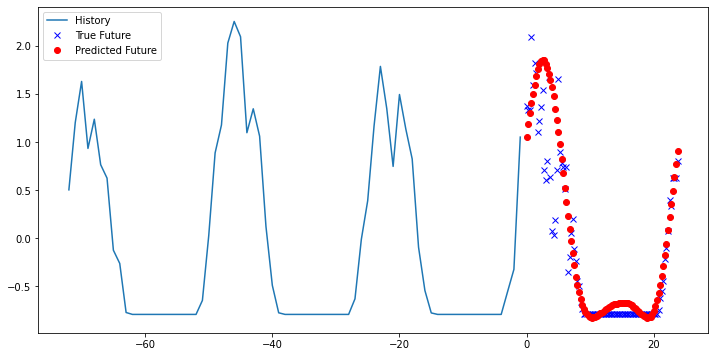

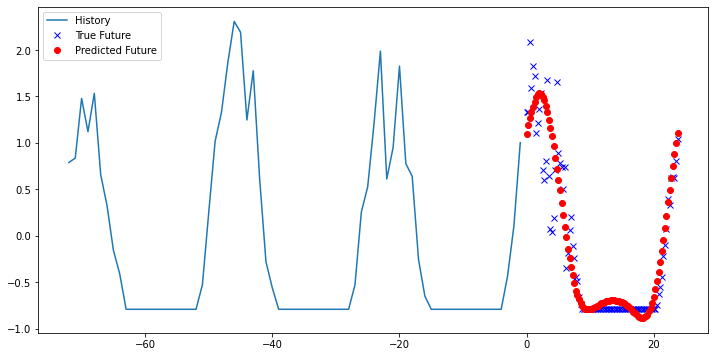

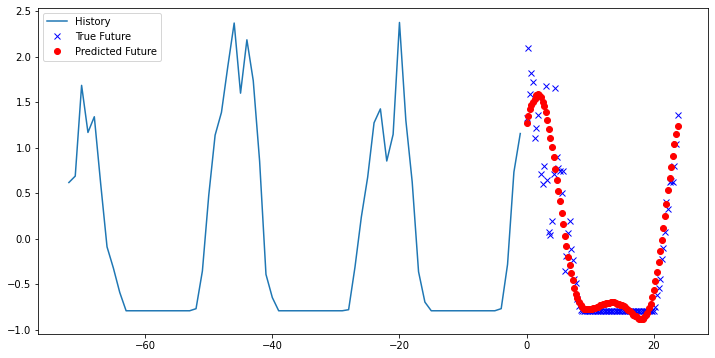

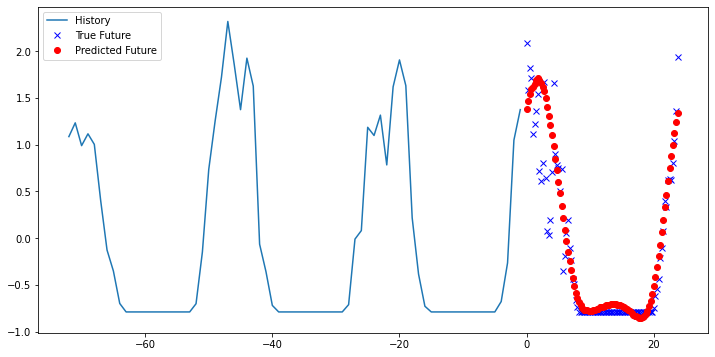

In [ ]:
print(len(mc_predictions))
i = 0
for y_pred in mc_predictions:
  multi_step_plot(x_test_multi[i], y_test_multi[i], y_pred[i])
  i+=1